In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# из этого пакета мы будем использовать стандартные распределения
import scipy
import warnings
warnings.filterwarnings('ignore')

In [2]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

In [3]:
FILE_PATH = '/Users/anton.andreytsev/Empirical-Statistics-EF-MSU-2019/'

### Основные понятия теории вероятностей

#### Классическая вероятность

$\Omega = \{\omega_{1}, \omega_{2}, \dots, \omega_{n}   \}$ - пространство элементарных исходов, т.е. все возможные реализации в рамках эксперимента. $|\Omega|$ (мощность омега) - количество элементов в этом множестве.

${\bf Пример:}$

Подбрасывается 3 раза монета - как будет выглядеть $\Omega$?

${\bf Решение:}$

$\Omega = \{ooo, oop, opo, poo, opp, ppo, pop, ppp  \}$

Назовём событием А - множество всех элементарных исходов (из $\Omega$), которые удовлетворяют наступлению события А (то есть $A \subset \Omega$). Назовём вероятностью события A ($\mathbb{P}(A)$) отношение мощности А к мощности $\Omega$, то есть $\mathbb{P}(A) = \frac{|A|}{|\Omega|}$

${\bf Пример:}$

Найти вероятность того, что среди трёх бросков монеты хотя бы 1 раза выпадет орёл.

${\bf Решение:}$

$\Omega = \{ ooo, oop, opo, poo, opp, ppo, pop, ppp  \}, \ A = \{ ooo, oop, opo, poo, opp, ppo, pop \}, \Rightarrow |A| = 7, |\Omega| = 8$

Получаем: $\mathbb{P}(A) = \frac{7}{8} = 0.875$

При решении практических задач множества А и $\Omega$ могут быть сложно устроенными и потому прямой подсчёт вероятности затруднителен, однако следствие из [Теоремы Муавра-Лaпласа](https://en.wikipedia.org/wiki/De_Moivre–Laplace_theorem) позволяет оценить погрешность приблежённой оценки вероятности как $$ \mathbb{P} \left( \left| \frac{m}{n} - p  \right| < \epsilon  \right) \underset{n \to \infty}{\to} 2 \cdot \Phi_{0}\left(\epsilon \cdot \sqrt{\frac{n}{p \cdot (1- p)}} \right)  $$

где p - истинная вероятность оцениваемого события, n - число экспериментов, m - число раз, когда эксперимент окончился успехом (то есть $\frac{m}{n}$ - эмпирическая вероятность), $\Phi_{0}(x) = \frac{1}{\sqrt{2 \pi}} \int\limits_{0}^{x} e^{-\frac{t^2}{2}} \ dt$ - неберущийся интерал, но для которого есть таблица значений (таблица Лапласа).

$\Phi_{0}(x)$ - монотонно возрастающая функция, поэтому с ростом n вероятность отклонения эмпирической оценки от теоретической не больше чем на $\epsilon$ стремится к 1.

Оценим вероятность в предыдущей задаче эмприрически

In [20]:
n = int(1e6)
m = 0
for i in tqdm_notebook(range(n)):
    coin_toss_3_times = np.random.randint(0, 2, size=3)
    if coin_toss_3_times.sum() >= 1:
        m += 1
print('Оценённая вероятность:', m/n)


Оценённая вероятность: 0.874755


Основные свойства вероятности:

$A \cup B$ (так же $A + B$) - объединение событий (то есть "наступило событие А или событие В"), $A \cap B$ (так же $(A, B)$ $(A B)$) - пересечение событий (то есть "наступило событие А и событие В"), $\bar A$ - отрицание события (то есть "наступило событие не А")

<p>&#9679; $\mathbb{P}(\Omega) = 1, \ \mathbb{P}(\emptyset) = 0$</p>

<p>&#9679; $\mathbb{P}(A \cap B) = \mathbb{P}(A) \cdot \mathbb{P}(B) \ $ если события А и B - независимы (об этом дальше)</p>

<p>&#9679; $\mathbb{P}(A \cup B) = \mathbb{P}(A) + \mathbb{P}(B) - \mathbb{P}(A \cap B)$ </p>

<p>&#9679; $\mathbb{P}(\overset{\_\_\_\_\_\_}{A \cup B}) = \mathbb{P}(\overset{\_\_}{A} \cap \overset{\_\_}{B}), \ \mathbb{P}(\overset{\_\_\_\_\_\_}{A \cap B}) = \mathbb{P}(\overset{\_\_}{A} \cup \overset{\_\_}{B})$</p>

<p>&#9679; $\mathbb{P}(A \cap B) = \mathbb{P}(A | B) \cdot \mathbb{P}(B) = \mathbb{P}(B | A) \cdot \mathbb{P}(A)$ - формула условной вероятности (отсюда же условная вероятность определятся как $\mathbb{P}(A|B) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)}$)</p>

<p>&#9679; $\mathbb{P}(A) = \sum\limits_{i=1}^n \mathbb{P}(A|H_{i}) \cdot \mathbb{P}(H_{i}) \ $ где $\sum\limits_{i=1}^n\mathbb{P}(H_{i}) = 1$ - формула полной вероятности  </p>

<p>&#9679; $\mathbb{P}(A|B) = \frac{\mathbb{P}(B|A) \cdot \mathbb{P}(A)}{\mathbb{P}(B)}$ - формула Байеса </p>

Проверим эмпирически верность формулы о вероятности объединения событий на следующей задаче: Подкидываются 3 игральных кубика (по 6 граней на каждом), найти вероятность того, что в сумме выпадет чётное число очков (событие А) или число очков, кратное 3 (событие В). 

In [51]:
n = int(1e6)
prob_dict = {'a_and_b': 0, 'a': 0, 'b': 0, 'a_or_b': 0}
for i in tqdm_notebook(range(n)):
    cube_tosses = np.random.randint(1, 7, size=3)
    cube_tosses_sum = cube_tosses.sum()
    if cube_tosses_sum % 2 == 0 and cube_tosses_sum % 3 == 0:
        prob_dict['a'] += 1/n
        prob_dict['b'] += 1/n
        prob_dict['a_and_b'] += 1/n
        prob_dict['a_or_b'] += 1/n
        
    elif cube_tosses_sum % 2 == 0 and cube_tosses_sum % 3 != 0:
        prob_dict['a'] += 1/n
        prob_dict['a_or_b'] += 1/n
        
    elif cube_tosses_sum % 2 != 0 and cube_tosses_sum % 3 == 0:
        prob_dict['b'] += 1/n
        prob_dict['a_or_b'] += 1/n 

print('P(A или B):', prob_dict['a_or_b'])
print("P(A) + P(B) - P(A и B):", prob_dict['a'] + prob_dict['b'] - prob_dict['a_and_b'])


P(A или B): 0.6661079999983169
P(A) + P(B) - P(A и B): 0.6661079999914006


#### Случайные величины

Теперь рассмотрим определение случайной величины

Отображение $\xi$, которое действует из множества элементарных исходов, в множество действительных чисел называется случайной величиной ($\xi: \Omega \to \mathbb{R}$). Примеры случайных величин (с.в.): Эксперимент - побрасываем n костей, с.в. - число раз, когда выпал орёл (дискретная с.в.), эксперимент - стреляем по мишени в тире, с.в. - расстояние от точки попадания до центра мишени (непрерывная с.в.), эксперимент - замер температуры на улице, с.в. - значение температуры (непрерывная с.в.).

Случайные величины описываются <font color='red'>${\it законом \ распределения}$</font>. Законом распределения (дискретной) случайной величины называется таблица: 

| $x_{1}$ | $x_{2}$ | $\dots$ |$x_{n}$ | 
| --- | --- | --- | --- |
| $\mathbb{P}(\xi = x_{1})$ | $\mathbb{P}(\xi = x_{2})$  | $\dots$ |$\mathbb{P}(\xi = x_{n})$  |

Где $x_{1}, \dots, x_{n}$ - всевозможные значения, которые принимает случайная величина (Обратите внимание, что ввиду этого $\sum\limits_{i=1}^n \mathbb{P}(\xi = x_{i}) = 1$)

Найдём эмпирический закон распределения (вероятности не будут суммироваться в 1) случайной величины $\xi$ в такой задаче: игральный кубик бросается до тех пор, пока сумма накопленных очков не превзойдёт 5. Найти закон распределения числа бросков.


{1: 0.33322699999800254, 2: 0.5002599999935479, 3: 0.14813600000012747, 4: 0.017646999999996995, 5: 0.0007300000000000112}
сумма вероятностей: 0.9999999999916749


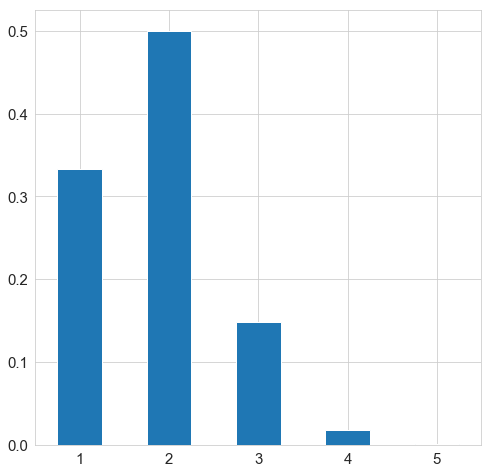

In [91]:
n = int(1e6)
porog = 5
xi_dict = {}
for i in tqdm_notebook(range(n)):
    cum_sum = 0
    n_tosses = 0
    while cum_sum < porog:
        cube_toss = np.random.randint(1, 7)
        cum_sum += cube_toss
        n_tosses += 1
    if n_tosses not in xi_dict:
        xi_dict[n_tosses] = 1/n
    else:
        xi_dict[n_tosses] += 1/n
xi_dict = dict(sorted(xi_dict.items()))
print(xi_dict)
print('сумма вероятностей:', sum(list(xi_dict.values())))
pd.Series(xi_dict).sort_index().plot(kind='bar', fontsize=15);
plt.xticks(rotation=0);

Функцией распределения с.в. называется $F_{\xi}(x) = \mathbb{P}(\xi < x)$

Для предыдущей задачи найдём функцию распределения с.в. $\xi$

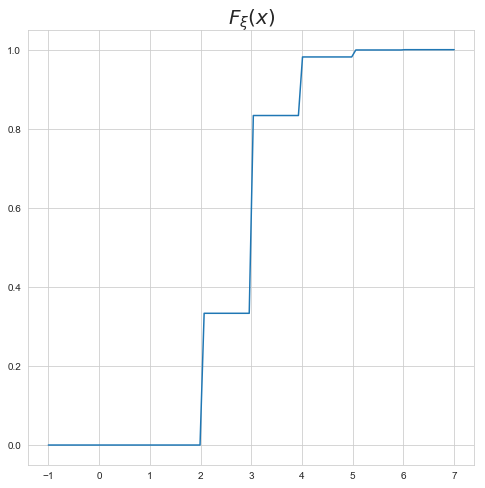

In [131]:
x_dom = np.linspace(-1, 7, 100)
distr_func = lambda x: [sum([xi_dict.get(i, 0) for i in range(int(np.floor(x_dom[0])), int(np.floor(j)))]) for j in x]

plt.plot(x_dom, distr_func(x_dom));
plt.title(r'$F_{\xi}(x)$', fontsize=20);

Заметим, что для любой с.в. $\xi$ будет верно: $F_{\xi}(-\infty) = 0, \ F_{\xi}(+ \infty) = 1$ и $F_{\xi}(x)$ - монотонно неубывающая функция.

Основное свойство функции распределения: $\mathbb{P}(a < \xi < b) = F_{\xi}(b) - F_{\xi}(a)$

Кроме закона распределения у с.в. есть так же всевозможные характеристики, рассмотрим некоторые из них

$\mathbb{E}\xi = \sum\limits_{i=1}^n x_{i} \cdot \mathbb{P}(\xi = x_{i})$ - математическое ожидание (дискретной с.в.). Интерпретация - среднее значение случайной величины.

$\mathbb{D}\xi = \mathbb{E}(\xi - \mathbb{E}\xi)^2$ - дисперсия. Интерпретация - насколько сильно с.в. отклоняется от своего среднего значения. 

$\sigma = \sqrt{\mathbb{D}\xi} $ - стандартное отклонение. Интерпретируется так же, как $\mathbb{D}\xi$, но в отличии от последней имеет единицы измерения такие же как и $\xi$.

<font color='purple'>Свойства $\mathbb{E}\xi$:</font>

<p>&#9679; $\mathbb{E}(C) = C$, где C - константа </p>

<p>&#9679; $\mathbb{E}(\xi + \eta) = \mathbb{E}\xi + \mathbb{E}\eta$ </p>

<p>&#9679;  $\mathbb{E}(C \cdot \xi) = C \cdot \mathbb{E}\xi$</p>

<p>&#9679;$^{\ast}$  $\mathbb{E}(\xi \cdot \eta) = \mathbb{E}\xi \cdot \mathbb{E}\eta$ - это свойство выполняется только в случае независимости $\xi$ и $\eta$ ($\xi \perp \eta$)</p>

<font color='purple'>Свойства $\mathbb{D}\xi$:</font>

<p>&#9679; $\mathbb{D}(C) = 0$, где C - константа </p>

<p>&#9679; $\mathbb{D}(\xi + \eta) = \mathbb{D}\xi + \mathbb{D}\eta + 2 \cdot cov(\xi, \eta)$ </p>

<p>&#9679;  $\mathbb{D}(C \cdot \xi) = C^2 \cdot \mathbb{D}\xi$</p>


Для предыдущей задачи найдём $\mathbb{E}\xi, \ \mathbb{D}\xi, \ \sigma$

In [140]:
mean_xi = sum([x*prob for x, prob in xi_dict.items()])
print('Матожидание:', mean_xi)
var_xi = sum([x**2*prob for x, prob in xi_dict.items()]) - mean_xi**2
print('Дисперсия:', var_xi)
print('Стандартное отклонение:', np.sqrt(var_xi))

Матожидание: 1.852392999985469
Дисперсия: 0.5367331735781282
Стандартное отклонение: 0.7326207569937725


Дискретные распределения

Существуют некоторые "классические" законы распределения, познакомимся с некоторыми из них

<font color='red'>распределение Бернулли</font>

Возникает в эксперименте, где всего два возможных исхода (называемые успехом и неудачей соответственно)

$\xi \sim $ Bern(p) $\Rightarrow \mathbb{P}(\xi = x) = p^x (1 - p)^{1 - x}, \ x \in \{0, 1\}$ (По сути это та же монетка)

$\mathbb{E}\xi = p, \ \mathbb{D}\xi = p \cdot (1 - p)$

<font color='red'>распределение Биномиальное</font>

Возникает в случае n испытаний Бернулли

$\xi \sim$ Bin(n, p) $\Rightarrow \mathbb{P}(\xi = x) = C_{n}^x p^{x} (1 - p)^{n - x}, \ x=0, 1, \dots, n$

$\mathbb{E}\xi = np, \ \mathbb{D}\xi = np(1-p)$

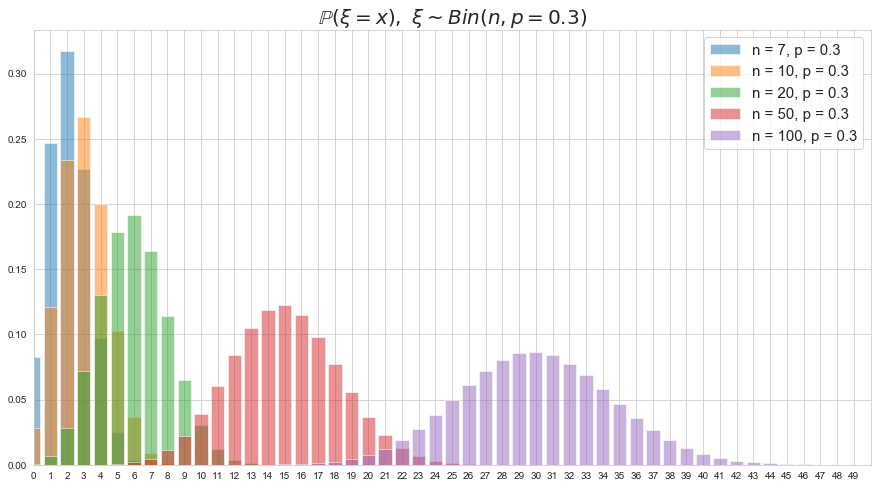

In [96]:
plt.figure(figsize=(15, 8))
for n in [7, 10, 20, 50, 100]:
    x_dom = np.arange(0, n)
    plt.bar(x_dom, scipy.stats.distributions.binom.pmf(x_dom, n=n, p=0.3), alpha=0.5, label='n = {}, p = 0.3'.format(n));
plt.legend(fontsize=15);
plt.title(r'$\mathbb{P}(\xi = x), \ \xi \sim Bin(n, p=0.3)$', fontsize=20);
plt.xlim(0, 50)
plt.xticks(x_dom[:50]);

<font color='red'>распределение Пуассона</font>

Возникает как предельный случай распределения Биномиального, при $n \to \infty, \ p \to 0, \ np \to \lambda$

$\xi \sim $ Poi($\lambda$) $\Rightarrow \mathbb{P}(\xi = x) = \frac{\lambda^x}{x!}e^{-\lambda}, \ x = 0, 1, 2, \dots$

$\mathbb{E}\xi = \lambda, \ \mathbb{D}\xi = \lambda$

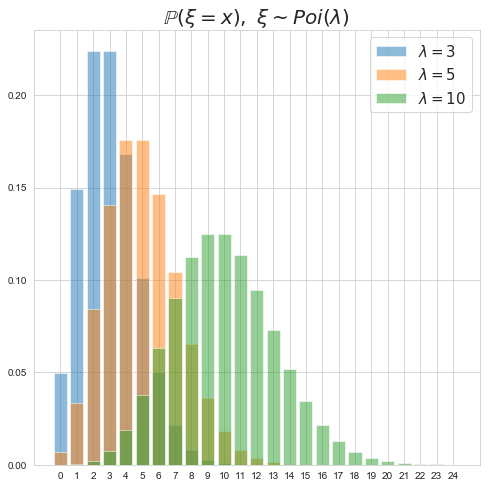

In [73]:
x_dom = np.arange(0, 25)
plt.bar(x_dom, scipy.stats.distributions.poisson.pmf(x_dom, mu=3), alpha=0.5, label=r'$\lambda = 3$');
plt.bar(x_dom, scipy.stats.distributions.poisson.pmf(x_dom, mu=5), alpha=0.5, label=r'$\lambda = 5$');
plt.bar(x_dom, scipy.stats.distributions.poisson.pmf(x_dom, mu=10), alpha=0.5, label=r'$\lambda = 10$');
plt.legend(fontsize=15);
plt.title(r'$\mathbb{P}(\xi = x), \ \xi \sim Poi(\lambda)$', fontsize=20);
plt.xticks(x_dom);

<font color='red'>распределение Геометрическое</font>

Возникает в задаче определения первого успеха в череде испытаний Бернулли. Пусть например $\xi$ - число бросков монеты, до первого впадения орла, тогда $\xi \sim $ Geom(0.5)

$\xi \sim $ Geom(p) $\Rightarrow \mathbb{P}(\xi = x) = p(1-p)^{x-1}, \ x=1, 2, \dots $

$\mathbb{E}\xi = \frac{1}{p}, \ \mathbb{D}\xi = \frac{1-p}{p^2}$

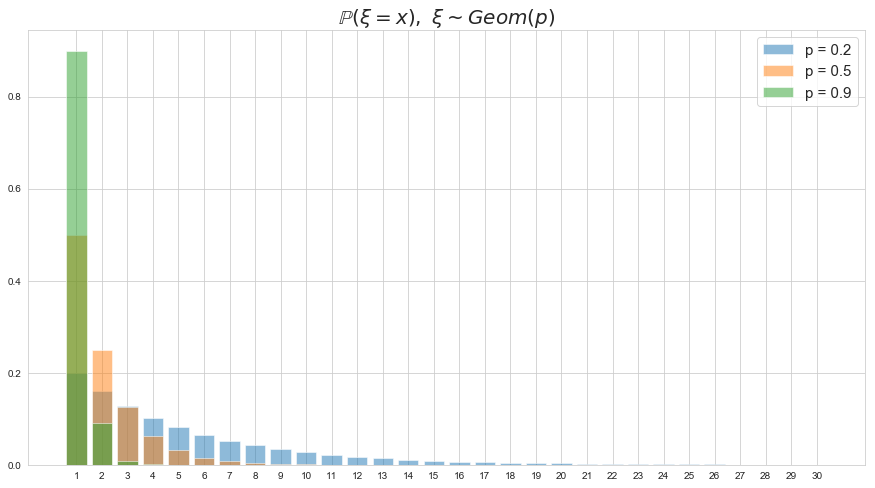

In [108]:
plt.figure(figsize=(15, 8))
x_dom = np.arange(1, 31)
for p in [0.2, 0.5, 0.9]:
    plt.bar(x_dom, scipy.stats.distributions.geom.pmf(x_dom, p=p), alpha=0.5, label='p = {}'.format(p));
plt.legend(fontsize=15);
plt.title(r'$\mathbb{P}(\xi = x), \ \xi \sim Geom(p)$', fontsize=20);
plt.xticks(x_dom);

Непрерывные распределения

Выше мы рассмотрели дискретные случайные величины и некоторые классические дискретные распределения. Теперь же рассмотрим некоторые классические непрерывные распределения.

Основное отличие от дискретных состоит в том, что непрерывные с.в. принимают несчётное число значений, а потому выписать для них закон распределения в виде таблицы, как это было для дискретных с.в. не представляется возможным. Для непрерывных с.в. вместо закона распределения вводится понятие <font color='purple'>плотности распределения</font> ($p_{\xi}(x)$). Неформально можно представлять, что плотность распределения это примерно то же самое, что вероятность для с.в. принять какое-то значение, т.е. $p_{\xi}(x) \approx \mathbb{P}(\xi = x)$, однако, как мы увидим далее, в отличае от вероятности, плотность может быть > 1.

<font color='purple'>Свойства $p_{\xi}(x):$</font>

<p>&#9679; $p_{\xi}(x) \ge 0, \ \forall x$ - условие неотрицательности</p>

<p>&#9679; $\int\limits_{- \infty}^{+ \infty} p_{\xi}(x) \ dx = 1$ - условие нормировки</p>

<p>&#9679; $F_{\xi}(x) = \mathbb{P}(\xi < x) = \int\limits_{-\infty}^x p_{\xi}(t) \ dt, \ p_{\xi}(x) = F_{\xi}(x)^{\prime}$</p> - взаимосвязь плотности и функции распределения

Ввиду несчётности множества значений непрерывной с.в. матожидание не может теперь определяться, как $\sum\limits_{i=1}^n x_{i} \cdot \mathbb{P}(\xi = x)$. В непрерывном случае матожидание определяется как $\mathbb{E}\xi = \int\limits_{- \infty}^{+ \infty} x \cdot p_{\xi}(x) \ dx$ 

Остальные характеристики ($\mathbb{D}\xi, \ \sigma, \ \dots$) для непрерывных с.в. определяются точно так же, как и для дискретных

Рассмотрим некоторые классические непрерывные распределения

<font color='red'>Равномерное распределение (на отрезке [a, b])</font>

$\xi \sim Uni(a, b) \Rightarrow p_{\xi}(x) = \left\{\begin{array}{rcl}  \frac{1}{b-a}, x \in [a, b] \\ 0, x \not \in [a, b]  \end{array} \right., \ F_{\xi}(x) = \left\{\begin{array}{rcl}  0, x \le a \\ \frac{x - a}{b-a}, x \in [a, b] \\ 1, x \ge b  \end{array} \right.$

$\mathbb{E}\xi = \frac{a+b}{2}, \ \mathbb{D}\xi = \frac{(b-a)^2}{12}$

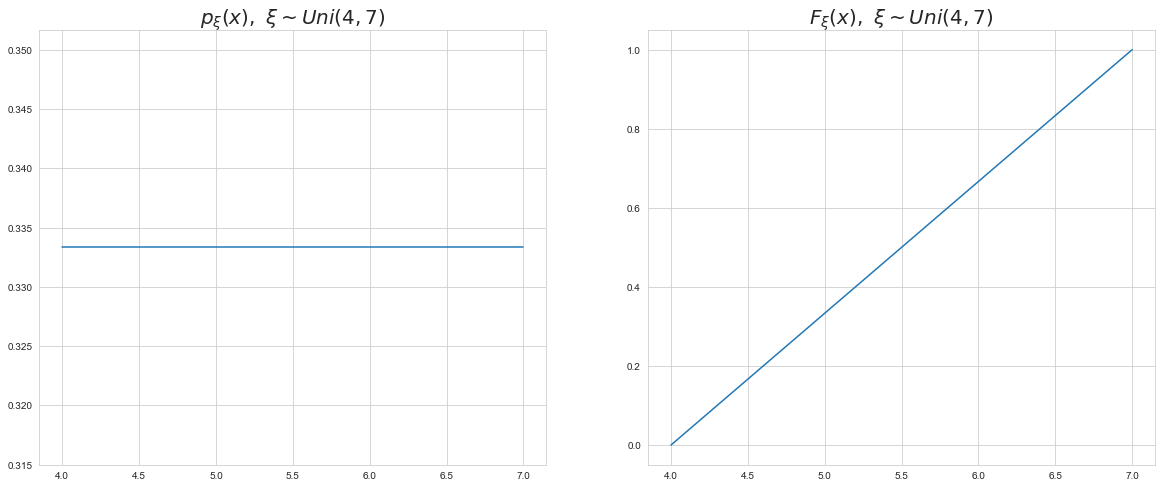

In [127]:
a, b = 4, 7
x_dom = np.linspace(a, b, 100)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax[0].plot(x_dom, [1/(b-a) for i in x_dom]);
ax[0].set_title(r'$p_{\xi}(x), \ \xi \sim Uni(4, 7)$', fontsize=20);
ax[1].plot(x_dom, [(i - a)/(b-a) for i in x_dom]);
ax[1].set_title(r'$F_{\xi}(x), \ \xi \sim Uni(4, 7)$', fontsize=20);

<font color='red'>Показательное (экспоненциальное) распределение</font>

С помощью показательного распределения моделируется время ожидания между событиями.

$\xi \sim Exp(\theta) \Rightarrow p_{\xi}(x) = \frac{1}{\theta}e^{-\frac{x}{\theta}}, \ x \ge 0, \ F_{\xi}(x) = 1 - e^{-\frac{x}{\theta}}, x \ge 0$

$\mathbb{E}\xi = \theta, \ \mathbb{D}\xi = \theta^2$

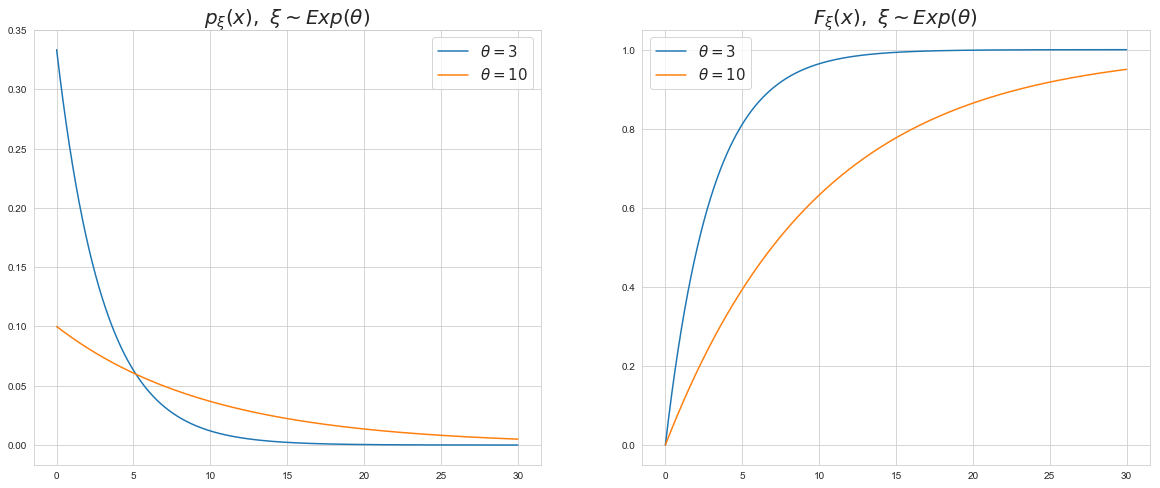

In [149]:
x_dom = np.linspace(0, 30, 1000)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
p_exp = lambda x, theta: (1/theta)*np.exp(-x/theta)
F_exp = lambda x, theta: 1 - np.exp(-x/theta)
ax[0].plot(x_dom, p_exp(x_dom, 3), label=r'$\theta = 3$');
ax[0].plot(x_dom, p_exp(x_dom, 10), label=r'$\theta = 10$');
ax[0].legend(fontsize=15);
ax[0].set_title(r'$p_{\xi}(x), \ \xi \sim Exp(\theta)$', fontsize=20);
ax[1].plot(x_dom, F_exp(x_dom, 3), label=r'$\theta = 3$');
ax[1].plot(x_dom, F_exp(x_dom, 10), label=r'$\theta = 10$');
ax[1].legend(fontsize=15);
ax[1].set_title(r'$F_{\xi}(x), \ \xi \sim Exp(\theta)$', fontsize=20);

<font color='red'>Нормальное распределение</font>

Пожалуй самое часто используемое в приложениях, а особенно в эмпирических методах распределение. Возникает как предельный случай некоторых распределений (Биномиального при $n \to \infty$, Стьюдента, Коши, Пуассона и др.). Фигурирует в [Центральной предельной теореме](https://ru.wikipedia.org/wiki/Центральная_предельная_теорема).

$\xi \sim \mathcal{N}(a, \sigma^2) \Rightarrow p_{\xi}(x) = \frac{1}{\sigma \sqrt{2 \pi}} \cdot e^{- \frac{(x - a)^2}{2 \sigma^2}}, \ x \in \mathbb{R}, \ F_{\xi}(x) = \frac{1}{\sigma \sqrt{2 \pi}} \int\limits_{- \infty}^x e^{- \frac{(t - a)^2}{2 \sigma^2}} \ dt$

$\mathbb{E}\xi = a, \ \mathbb{D}\xi = \sigma^2$

$\mathcal{N}(0, 1)$ - стандартное нормальное распределение

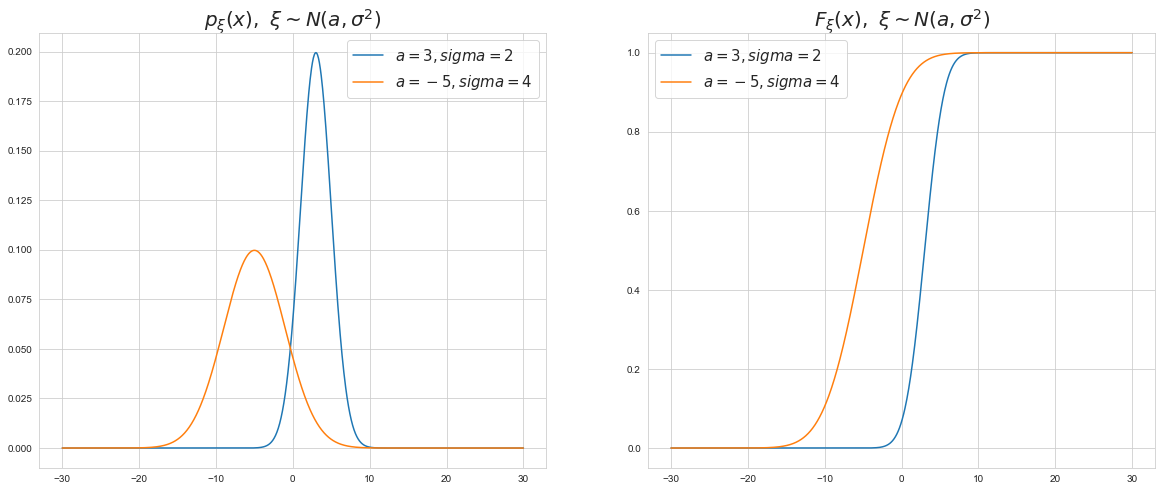

In [160]:
x_dom = np.linspace(-30, 30, 1000)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
p_exp = lambda x, a, sigma: (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x - a)**2/(2*sigma**2))
F_exp = lambda x, theta: 1 - np.exp(-x/theta)
ax[0].plot(x_dom, p_exp(x_dom, a=3, sigma=2), label=r'$a = 3, sigma = 2$');
ax[0].plot(x_dom, p_exp(x_dom, a=-5, sigma=4), label=r'$a = -5, sigma = 4$');
ax[0].legend(fontsize=15);
ax[0].set_title(r'$p_{\xi}(x), \ \xi \sim N(a, \sigma^2)$', fontsize=20);
ax[1].plot(x_dom, scipy.stats.distributions.norm.cdf(x_dom, loc=3, scale=2), label=r'$a = 3, sigma = 2$');
ax[1].plot(x_dom, scipy.stats.distributions.norm.cdf(x_dom, loc=-5, scale=4), label=r'$a = -5, sigma = 4$');
ax[1].legend(fontsize=15);
ax[1].set_title(r'$F_{\xi}(x), \ \xi \sim N(a, \sigma^2)$', fontsize=20);

<font color='red'>Логнормальное распределение</font>

Случайная величина $\xi$ имеет логнормальное распределение, если её логарифм имеет нормальное распределение $\log \xi \sim \mathcal{N}(a, \sigma^2)$. Это распределение очень часто возникает в практических задачах. Одно из его проявлений такое: логнормальное распределение хорошо описывает распределение частот размеров частиц при дроблении целого объекта (размеры осколков при дроблении стеклянной посуды, размер градин в граде и т.д.).

$\xi \sim logN(a, \sigma^2) \Rightarrow p_{\xi}(x) = \frac{1}{\sigma  x  \sqrt{2 \pi}} \exp{-\frac{(\ln x - a)^2}{2 \sigma^2}}, \ x > 0$

$\mathbb{E}\xi = e^{a + \frac{\sigma^2}{2}}, \ \mathbb{D}\xi = (e^{\sigma^2} - 1 ) \cdot e^{2a + \sigma^2}$

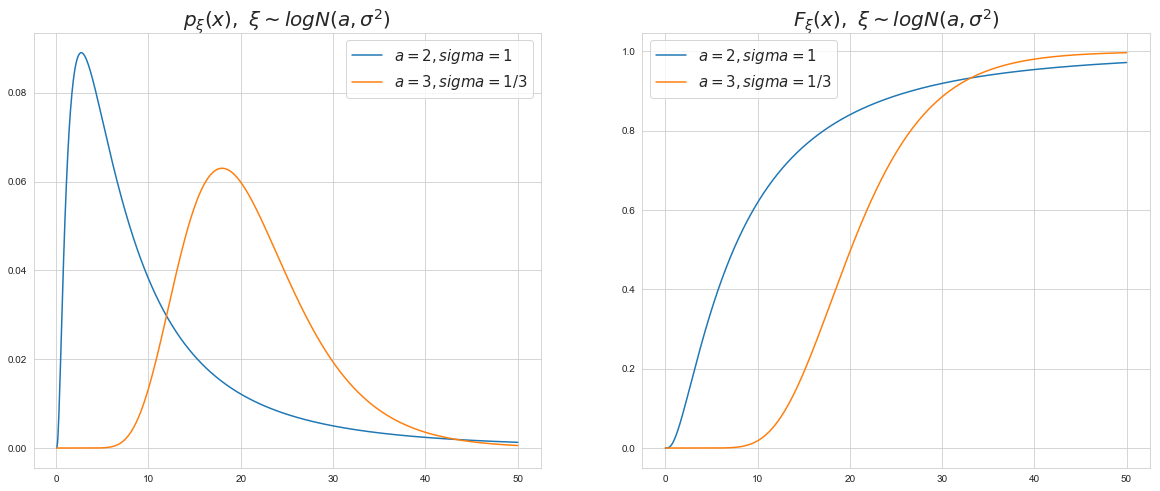

In [114]:
x_dom = np.linspace(0, 50, 1000)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
p_exp = lambda x, a, sigma: (1/(x*sigma*np.sqrt(2*np.pi)))*np.exp(-(np.log(x) - a)**2/(2*sigma**2))
F_exp = lambda x, a, sigma: 0.5 + 0.5*scipy.special.erf((np.log(x) - a)/(sigma*np.sqrt(2)))
ax[0].plot(x_dom, p_exp(x_dom, a=2, sigma=1), label=r'$a = 2, sigma = 1$');
ax[0].plot(x_dom, p_exp(x_dom, a=3, sigma=1/3), label=r'$a = 3, sigma = 1/3$');
ax[0].legend(fontsize=15);
ax[0].set_title(r'$p_{\xi}(x), \ \xi \sim logN(a, \sigma^2)$', fontsize=20);
ax[1].plot(x_dom, F_exp(x_dom, a=2, sigma=1), label=r'$a = 2, sigma = 1$');
ax[1].plot(x_dom, F_exp(x_dom, a=3, sigma=1/3), label=r'$a = 3, sigma = 1/3$');
ax[1].legend(fontsize=15);
ax[1].set_title(r'$F_{\xi}(x), \ \xi \sim logN(a, \sigma^2)$', fontsize=20);

Проверим, что если $\xi \sim logN(a, \sigma^2) \Rightarrow \log\xi \sim \mathcal{N}(a, \sigma^2)$

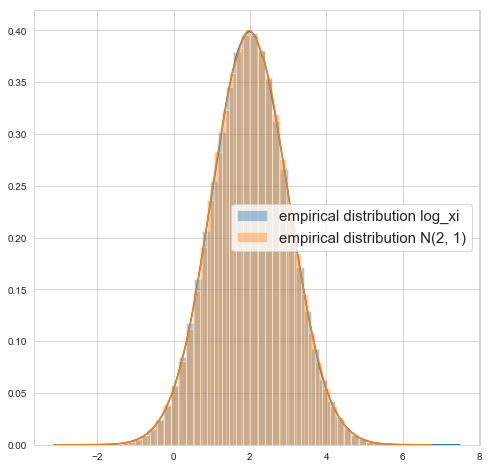

In [125]:
xi = np.random.lognormal(mean=2, sigma=1, size=int(1e6))
log_xi = np.log(xi)
normal_rv = np.random.normal(loc=2, scale=1, size=int(1e6))
sns.distplot(log_xi, label='empirical distribution log_xi');
sns.distplot(normal_rv, label='empirical distribution N(2, 1)');
plt.legend(fontsize=15);

<font color='red'>Распределение $\chi^2_{n}$</font>

Хи-квадрат распределение это по определению распределение суммы квадратов с.в., имеющих стандартное нормальное распределение 

($\eta = \sum\limits_{i=1}^n \xi_{i}^2, \ \xi_{i} \sim \mathcal{N}(0, 1), \Rightarrow \eta \sim \chi^2_{n}$). Оно фигурирует в Лемме Фишера и возникает в ситуациях, когда мы хотим измерять Евклидовы расстояния между нормальными с.в.

$\xi \sim \chi^2_{n} \Rightarrow p_{\xi}(x) = \frac{x^{\frac{n}{2} - 1}}{2^{\frac{n}{2}} \Gamma(\frac{n}{2})} \cdot e^{-\frac{x}{2}}, \ x \ge 0$

$\Gamma(\alpha) = \int\limits_{0}^{+ \infty} x^{\alpha - 1} e^{-x} \ dx$ - Гамма функция Эйлера

$\mathbb{E}\xi = n, \ \mathbb{D}\xi = 2n$

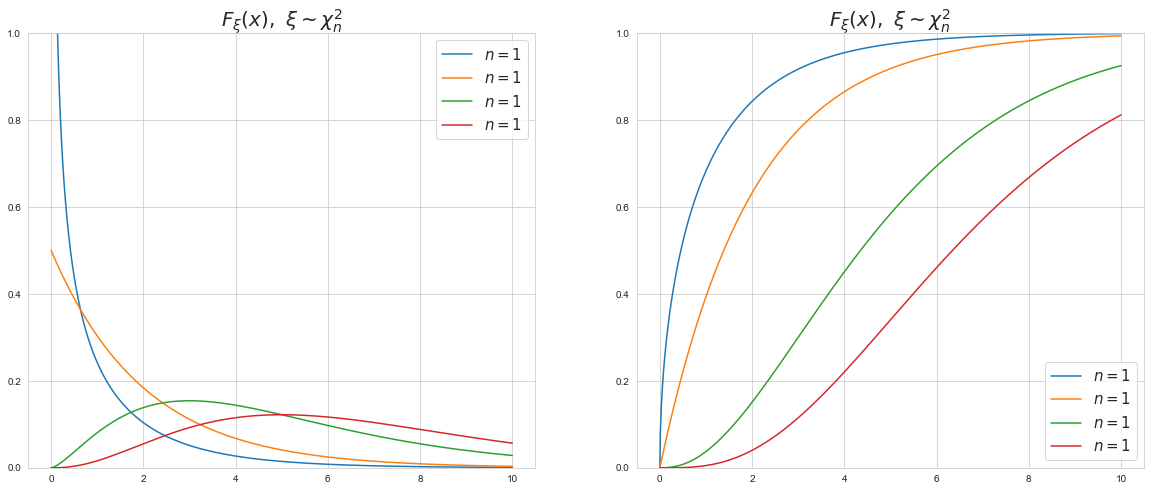

In [206]:
x_dom = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
for n in [1, 2, 5, 7]:
    ax[0].plot(x_dom, scipy.stats.distributions.chi2.pdf(x_dom, df=n), label=r'$n=1$');
    ax[0].set_ylim(0, 1)
    ax[0].legend(fontsize=15);
    ax[0].set_title(r'$F_{\xi}(x), \ \xi \sim \chi^2_{n}$', fontsize=20);
    ax[1].plot(x_dom, scipy.stats.distributions.chi2.cdf(x_dom, df=n), label=r'$n=1$');
    ax[1].set_ylim(0, 1)
    ax[1].legend(fontsize=15);
    ax[1].set_title(r'$F_{\xi}(x), \ \xi \sim \chi^2_{n}$', fontsize=20);

Проверим, что $\chi^2_{n} = \sum\limits_{i=1}^n \xi_{i}^2, \ \xi_{i} \sim \mathcal{N}(0, 1)$

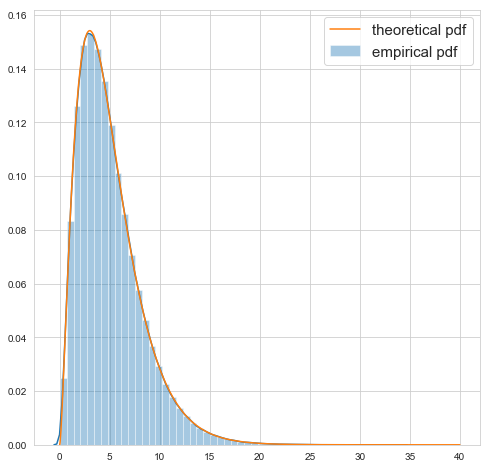

In [220]:
xi = np.random.normal(size=(int(1e6), 5))
x_dom = np.linspace(0, 40, 1000)
empir_chi = (xi**2).sum(axis=1)
sns.distplot(empir_chi, label='empirical pdf')
plt.plot(x_dom, scipy.stats.distributions.chi2.pdf(x_dom, df=5), label='theoretical pdf');
plt.legend(fontsize=15);

#### Многомерные случайные величины

$\vec \xi = (\xi_{1}, \dots, \xi_{n})$ - называется случайным вектором, $F_{\vec \xi}(x_{1}, \dots, x_{n}) = \mathbb{P}(\xi_{1} < x_{1}, \dots, \xi_{n} < x_{n})$ - его функция распределения, $p_{\vec \xi}(x_{1}, \dots, x_{n}) = \frac{\partial^{n}}{\partial x_{1} \dots \partial x_{n}} F_{\vec \xi}(x_{1}, \dots, x_{n})$ - его плотность распределения

<font color='red'>Многомерное нормальное распределение</font>

$\xi \sim \mathcal{N}(\vec a, \Sigma) \Rightarrow p_{\xi}(x) = \frac{1}{\sqrt{Det(2 \pi \Sigma)}} \exp\{ -\frac{1}{2}(x - a)^T \Sigma^{-1} (x- a)  \}$

$\mathbb{E}\xi = a, \ \mathbb{D}\xi = \Sigma$

$\mathcal{N}(0, I) $ - стандартное многомерное нормальное распределение ($I$ - единичная матриц)

Пример выборки из двумерного нормального распределения

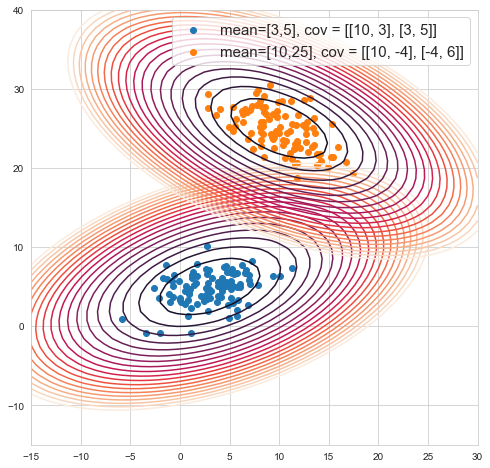

In [253]:
x_dom = np.linspace(-15, 30)
y_dom = np.linspace(-15, 40)
X, Y = np.meshgrid(x_dom, y_dom)
Z1 = 5*(X - 3)**2 + 10*(Y - 5)**2 - 6*(X - 3)*(Y - 5)
Z2 = 6*(X - 10)**2 + 10*(Y - 25)**2 + 8*(X - 10)*(Y - 25)
plt.contour(X, Y, Z1, np.linspace(0, 2000, 20))
plt.contour(X, Y, Z2, np.linspace(0, 2000, 20))
x1 = np.random.multivariate_normal(mean=[3, 5], cov=np.array([[10, 3], [3, 5]]), size=100)
x2 = np.random.multivariate_normal(mean=[10, 25], cov=np.array([[10, -4], [-4, 6]]), size=100)
plt.scatter(x1[:, 0], x1[:, 1], label='mean=[3,5], cov = [[10, 3], [3, 5]]');
plt.scatter(x2[:, 0], x2[:, 1], label='mean=[10,25], cov = [[10, -4], [-4, 6]]');
plt.legend(fontsize=15);
plt.xlim(-15, 30);
plt.ylim(-15, 40);

Со списком основных распределений можно ознакомиться [здесь](https://en.wikipedia.org/wiki/List_of_probability_distributions#Continuous_distributions)

Из совместного распределения можно найти частные и условные законы распределения:

Частный закон распределения

$p_{\xi_{1}, \dots, \xi_{m}}(x_{1}, \dots, x_{m}) =  \underset{\xi_{m+1}, \dots, \xi_{n}}{\int \dots \int} p_{\xi_{1}, \dots, \xi_{n}}(x_{1}, \dots, x_{n}) \ dx_{m+1} \ \dots \ dx_{n} $

Условный закон распределения

$p_{\xi_{1}, \dots, \xi_{m} | \xi_{m+1}, \dots, \xi_{n}}(x_{1}, \dots, x_{m}|x_{m+1}, \dots, x_{n}) = \frac{p_{\xi_{1}, \dots, \xi_{n}}(x_{1}, \dots, x_{n})}{p_{\xi_{m+1}, \dots, \xi_{n}}(x_{m+1}, \dots, x_{n})}$

В частности, если есть $p_{\xi, \eta}(x, y)$, то 

$p_{\xi}(x) = \int\limits_{\mathbb{R}} p_{\xi, \eta}(x, y) \ dy$ и $p_{\eta}(y) = \int\limits_{\mathbb{R}} p_{\xi, \eta}(x, y) \ dx$

$p_{\xi | \eta}(x | y) = \frac{p_{\xi, \eta}(x, y)}{p_{\eta}(y)}$ и $p_{\eta | \xi}(y | x) = \frac{p_{\xi, \eta}(x, y)}{p_{\xi}(x)}$

Если $p_{\xi, \eta}(x, y) = p_{\xi}(x) \cdot p_{\eta}(y) \ \forall x, y$, то $\xi \perp \eta$

Характеристики двумерных с.в.:
    
<p>&#9679; $cov(\xi, \eta) = \mathbb{E}(\xi - \mathbb{E}\xi)(\eta - \mathbb{E}\eta) = \mathbb{E}(\xi \eta) - \mathbb{E}\xi \cdot \mathbb{E}\eta$</p> - ковариация (мера взаимозависимости с.в)

<p>&#9679;  $\rho = corr(\xi, \eta) = \frac{cov(\xi, \eta)}{\sqrt{\mathbb{D}\xi \cdot \mathbb{D}\eta}}$</p> - корреляция (мера линейной зависимости между с.в. $\xi$ и $\eta$, $-1 \le \rho \le 1$)


<font color='purple'>Свойства $cov(\xi, \eta):$</font>

<p>&#9679; $cov(\xi, \xi) = \mathbb{D}\xi$</p>

<p>&#9679; $cov(\xi, \eta) = cov(\eta, \xi)$</p>

<p>&#9679; $cov(\xi + \gamma, \eta) = cov(\xi, \eta) + cov(\gamma, \eta)$</p>

<p>&#9679; $cov(a \cdot \xi, \eta) = a \cdot cov(\xi, \eta)$</p>

<p>&#9679; $cov(a, \xi) = 0$</p>

<p>&#9679; $\xi  \perp \eta  \Rightarrow cov(\xi, \eta) = 0$, но $cov(\xi, \eta) = 0 \not \Rightarrow \xi \perp \eta$, Пример: $p_{\xi, \eta}(x, y) = C (x^2 + y^2)^2 e^{-x^2-y^2}, \ x,y \in \mathbb{R}^2$</p>





#### Операции со случайными величинами

Со случайными величинами можно производить привычные алгебраические операции (+, -, *, \ и т.д.), при этом у результирующей случайной величины будет неочевидным образом трансформироваться плотность.

Пример

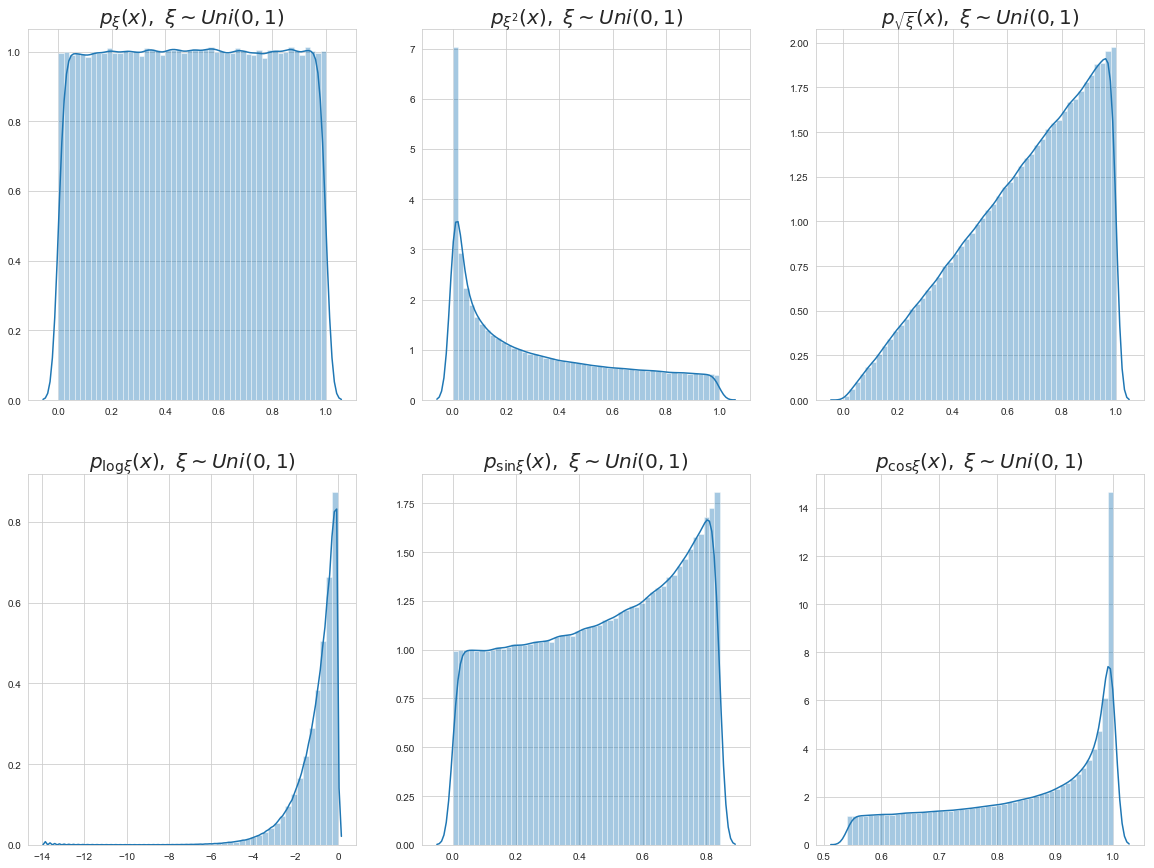

In [270]:
x = np.random.uniform(size=int(1e6))
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
sns.distplot(x, ax=ax[0, 0]);
sns.distplot(x**2, ax=ax[0, 1]);
sns.distplot(np.sqrt(x), ax=ax[0, 2]);
sns.distplot(np.log(x), ax=ax[1, 0]);
sns.distplot(np.sin(x), ax=ax[1, 1]);
sns.distplot(np.cos(x), ax=ax[1, 2]);
ax[0, 0].set_title(r'$p_{\xi}(x), \ \xi \sim Uni(0,1)$', fontsize=20);
ax[0, 1].set_title(r'$p_{\xi^2}(x), \ \xi \sim Uni(0,1)$', fontsize=20);
ax[0, 2].set_title(r'$p_{\sqrt{\xi}}(x), \ \xi \sim Uni(0,1)$', fontsize=20);
ax[1, 0].set_title(r'$p_{\log \xi}(x), \ \xi \sim Uni(0,1)$', fontsize=20);
ax[1, 1].set_title(r'$p_{\sin \xi}(x), \ \xi \sim Uni(0,1)$', fontsize=20);
ax[1, 2].set_title(r'$p_{\cos \xi}(x), \ \xi \sim Uni(0,1)$', fontsize=20);

$\xi \sim p_{\xi}(x), \ \eta = f(\xi) \Rightarrow p_{\eta}(y) = ?$

В случае, когда f монотонная дифференцируемая функция для $p_{\eta}(y)$ существует аналитическое выражение:

$p_{\eta}(y) = p_{\xi}(f^{-1}(y)) \cdot |f^{-1}(y)^{\prime}_{y}|, \ $ где $f^{-1} $ - обратная функция 

Свёрткой случайных величин ($\xi$ и $\eta$) называется плотность их взаимодействия (то есть $p_{f(\xi, \eta)}(x): \ $ например $p_{\xi + \eta}(x), \ p_{\xi \cdot \eta}(x), \ ...$)

Например свётка суммы двух равномерно распределённых с.в. будет треугольными распределением

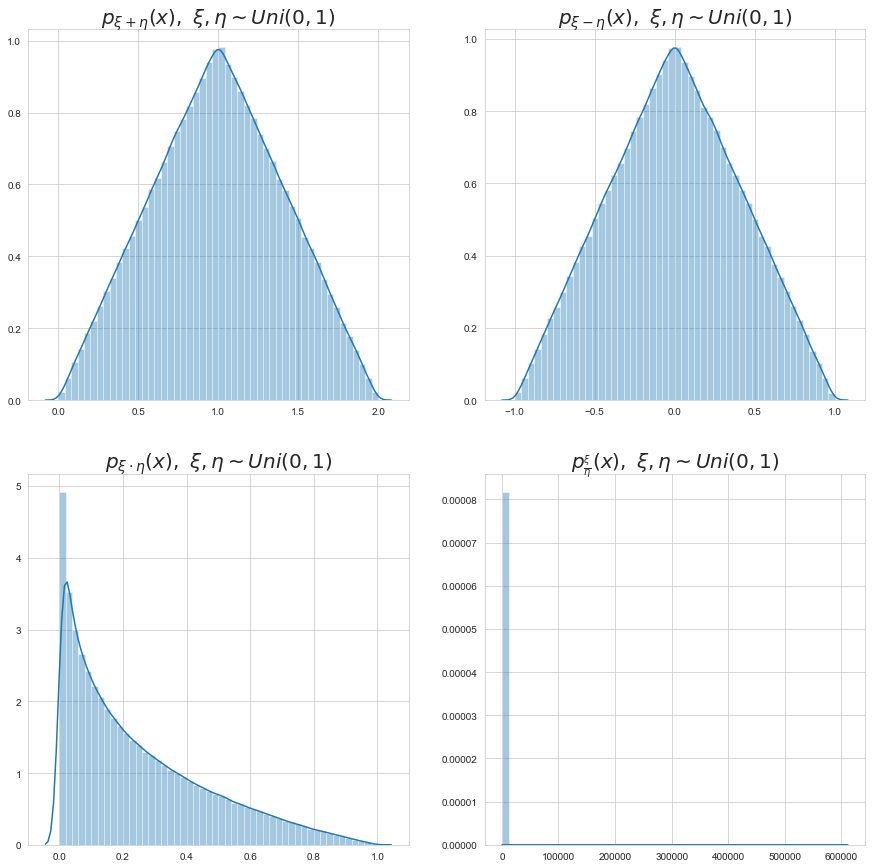

In [276]:
x = np.random.uniform(size=int(1e6))
y = np.random.uniform(size=int(1e6))
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
sns.distplot(x+y, ax=ax[0, 0]);
sns.distplot(x-y, ax=ax[0, 1]);
sns.distplot(x*y, ax=ax[1, 0]);
sns.distplot(x/y, ax=ax[1, 1]);
ax[0, 0].set_title(r'$p_{\xi + \eta}(x), \ \xi, \eta \sim Uni(0,1)$', fontsize=20);
ax[0, 1].set_title(r'$p_{\xi - \eta}(x), \ \xi, \eta\sim Uni(0,1)$', fontsize=20);
ax[1, 0].set_title(r'$p_{\xi \cdot \eta}(x), \ \xi, \eta \sim Uni(0,1)$', fontsize=20);
ax[1, 1].set_title(r'$p_{\frac{\xi}{\eta}}(x), \ \xi, \eta \sim Uni(0,1)$', fontsize=20);

Основные формулы свёртки:
    
<p>&#9679; $p_{\xi + \eta}(x) = \int\limits_{\mathbb{R}} p_{\xi}(x - y) \cdot p_{\eta}(y) \ dy$  </p>

<p>&#9679;  $p_{\xi - \eta}(x) = \int\limits_{\mathbb{R}} p_{\xi}(x + y) \cdot p_{\eta}(y) \ dy$</p>

<p>&#9679;  $p_{\xi \cdot \eta}(x) = \int\limits_{\mathbb{R}} \frac{1}{|y|} \cdot p_{\xi}(\frac{x}{y}) \cdot p_{\eta}(y) \ dy$</p>

<p>&#9679;  $p_{\frac{\xi}{\eta}}(x) = \int\limits_{\mathbb{R}} |y| \cdot p_{\xi}(x \cdot y) \cdot p_{\eta}(y) \ dy$</p>

Некоторые классические факты про свёртки:

Нормальное распределение устойчиво относительно линейных операций (то есть, если $\xi, \eta \sim \mathcal{N} \Rightarrow \forall a, b \in \mathbb{R} \ a \cdot \xi + b \cdot \eta \sim \mathcal{N}$)

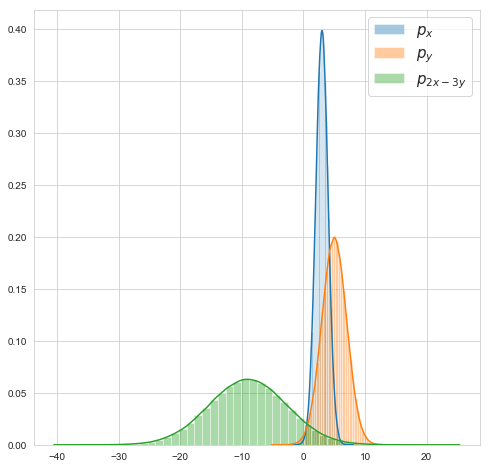

In [281]:
x = np.random.normal(loc=3, scale=1, size=int(1e6))
y = np.random.normal(loc=5, scale=2, size=int(1e6))
sns.distplot(x, label=r'$p_{x}$');
sns.distplot(y, label=r'$p_{y}$');
sns.distplot(2*x - 3*y, label=r'$p_{2x - 3y}$');
plt.legend(fontsize=15);

Некоторые классические распределения получаются как [свёртки других распределений](https://en.wikipedia.org/wiki/List_of_convolutions_of_probability_distributions) (Например гамма распределение является свёрткой суммы экспоненциальных распределений)

Пожалуй самый известный результат из теории свёрток - [ЦПТ](https://ru.wikipedia.org/wiki/Центральная_предельная_теорема). Её смысл: как бы не были распределены с.в. $\xi_{i} \ i=1, 2, \dots, n$ (главное что одинакого), если мы возьмём достаточно большое n, то свёртка их суммы будет иметь нормальное распределение, а в частности с.в. $\eta = \frac{\frac{1}{n}\sum\limits_{i=1}^n \xi_{i} - \mathbb{E}\xi_{i}}{\sigma(\xi_{i})} \cdot \sqrt{n} \sim \mathcal{N}(0, 1)$

Возьмём например распределение совсем не похожее на нормальное и посмотрим на трансформацию свёртки суммы таких с.в. с ростом n

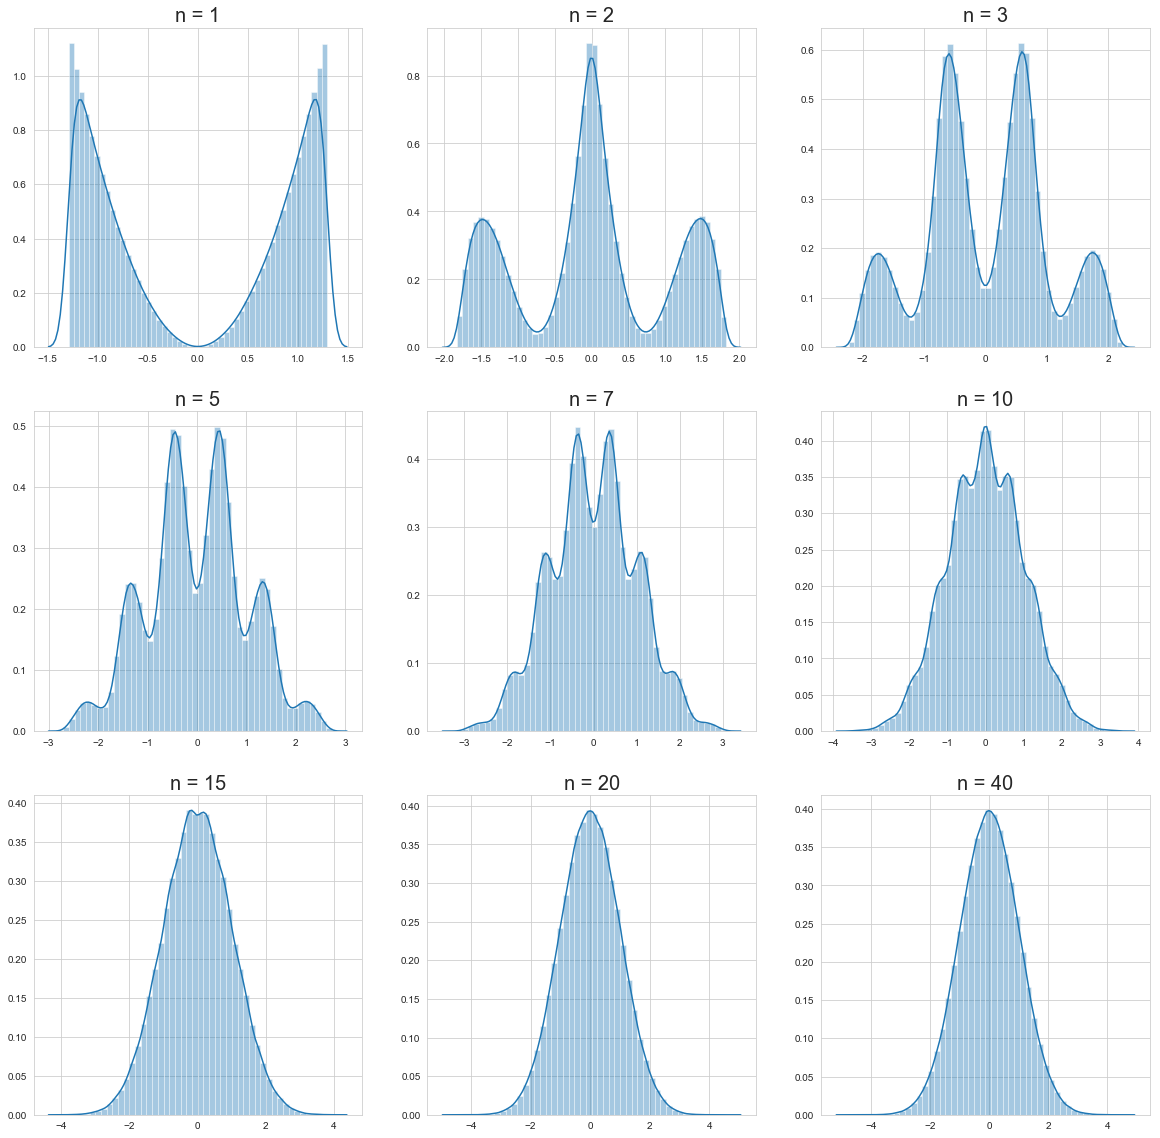

In [366]:
import itertools
u = np.random.uniform(0, 1, size=(int(1e6), 50))
x = np.cbrt(2*u - 1)
E_x, D_x = 0, 0.6
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
n = [1, 2, 3, 5, 7, 10, 15, 20, 40]
for j, i in enumerate(itertools.product(range(3), range(3))):
    sns.distplot((x[:, :n[j]].mean(axis=1) - E_x)*np.sqrt(n[j])/(np.sqrt(D_x)), ax=ax[i[0], i[1]]);
    ax[i[0], i[1]].set_title('n = {}'.format(n[j]), fontsize=20);

### Основы статистики

Основные 2 задачи математической статистики - оценка параметров и тестирование гипотез. Познакомимся с первой задачей.

#### Оценка параметров

Пусть имеется независимая выборка (каждый объект генерировался независимо от других) из нормального распределения $x_{1}, x_{2}, \dots, x_{n} \sim \mathcal{N}(a, \sigma^2)$. Требуется по этой выборке восстановить параметры распределения $a$ и $\sigma^2$.

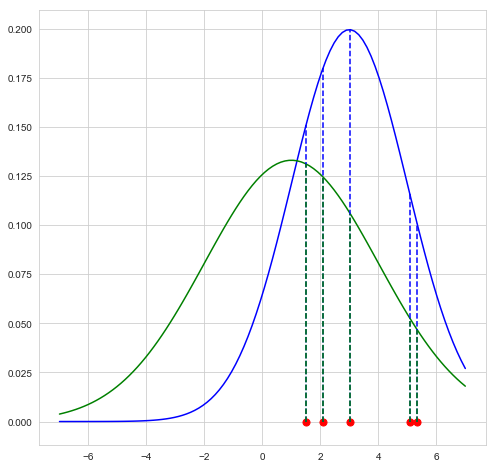

In [21]:
x = np.array([2.08625674, 5.07816519, 3.03753461, 1.51057565, 5.33561071]) # точки сгенерированы из распределения N(3, 2)
x_dom = np.linspace(-7, 7, 100)
distr_norm = lambda x, a, sigma: (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x - a)**2/(2*sigma**2))
plt.plot(x_dom, distr_norm(x_dom, 3, 2), color='blue');
plt.plot(x_dom, distr_norm(x_dom, 1, 3), color='green');
plt.scatter(x, [0]*len(x), s=50, color='red')
for i in x:
    plt.plot([i, i], [0, distr_norm(i, 3, 2)], linestyle='--', color='blue')
    plt.plot([i, i], [0, distr_norm(i, 1, 3)], linestyle='--', color='green')

Есть несколько способов оценки параметров: Метод моментов (ММ), Метод максимального правдоподобия (ММП), Метод спейсингов (http://www.lib.unn.ru/students/src/op2.pdf). Рассмотрим первые два из них.

Идея Метода моментов состоит в том, что мы находим оценки параметров исходя из условия, что теоретические [моменты распределения](https://ru.wikipedia.org/wiki/Моменты_случайной_величины) должны быть равны выборочным, то есть 

$$\mathbb{E}x^k = \frac{1}{n}\sum\limits_{i=1}^n x_{i}^k$$

$$\mathbb{D}x^k = \frac{1}{n}\sum\limits_{i=1}^n (x_{i} - \bar x)^k$$

Для нормального распределения получаем: $\hat a = \bar x, \ \hat \sigma^2 = \frac{1}{n}\sum\limits_{i=1}^n (x_{i} - \bar x)^2$

$\hat a = 3.41, \ \hat \sigma^2 = 2.4$

Идея метода максимального правдоподобия состоит, как это ни странно, в максимизации правдоподобия. Правдоподобием выборки называется величина $L = \prod\limits_{i=1}^n p(x_{i})$. Максимизируют обычно не само правдоподобие, а его логарифм (ввиду более простого вычисления производных).

Для задачи выше получаем: $\hat a = \underset{a}{argmax} L, \ \hat \sigma^2 = \underset{\sigma^2}{argmax} L$

Для нормального распределения ММП и ММ оценки совпадают

Убедимся, что значение правдоподобия для истинных параметров ($a = 3, \ \sigma^2 = 2$) больше, чем для других (например для $a = 1, \ \sigma^2 = 3$)

In [34]:
L1 = np.prod([distr_norm(x, 3, 2) for x in x])
L2 = np.prod([distr_norm(x, 1, 3) for x in x])
print('Правдоподобие для a={}, sigma^2={}: {}'.format(3, 2, L1))
print('Правдоподобие для a={}, sigma^2={}: {}'.format(1, 3, L2))

Правдоподобие для a=3, sigma^2=2: 6.352991740145508e-05
Правдоподобие для a=1, sigma^2=3: 4.258019834333623e-06


Для сравнения оценок пользуются следующими характеристиками: [несмещённость](https://ru.wikipedia.org/wiki/Несмещённая_оценка), [эффективность](https://ru.wikipedia.org/wiki/Эффективная_оценка), [состоятельность](https://ru.wikipedia.org/wiki/Состоятельная_оценка)

<font color='green'>Несмещённость</font>

Если по-простому, несмещённость означает, что если мы посчитаем нашу оценку по n выборкам ($\hat \theta_{1}, \hat \theta_{2}, \dots, \hat \theta_{n}$), то их среднее будет стремиться к истинной оценке с ростом n, то есть $\frac{1}{n}\sum\limits_{i=1}^n \hat \theta_{i} \underset{n \to \infty}{\to} \theta$

Проведём эксперимент по условию последней задачи

среднее значение a: 2.9913356578065424


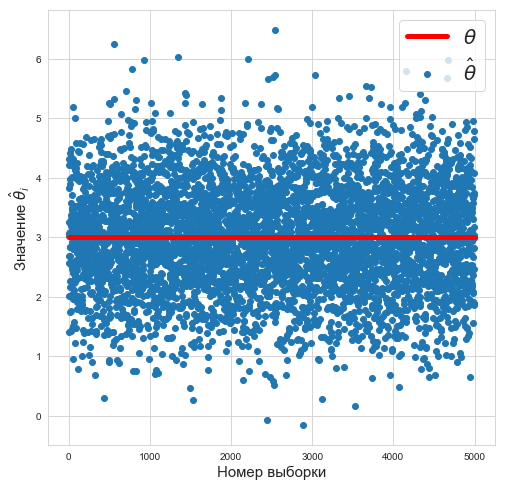

In [117]:
n = 5000
a = []
for i in range(n):
    a.append(np.random.normal(loc=3, scale=2, size=5).mean())
a = np.array(a)
print('среднее значение a:', a.mean())
plt.scatter(np.arange(n), a, label=r'$\hat \theta$');
plt.ylabel(r'Значение $\hat \theta_{i}$', fontsize=15);
plt.xlabel('Номер выборки', fontsize=15);
plt.plot([0, n], [3, 3], color='red', linewidth=5, label=r'$\theta$');
plt.legend(fontsize=20);

<font color='green'>Эффективность</font>

Оценка тем эффективнее, чем меньшее её дисперсия ($\mathbb{D}\hat \theta \ge \mathbb{D}\tilde \theta \Rightarrow \tilde \theta$ - более эффективная оценка). Оценка, имеющая [минимально возможную дисперсию](https://ru.wikipedia.org/wiki/Информационное_неравенство_(математическая_статистика)) называется эффективной (в каком-то классе оценок).

Пример

Пусть имеется выборка из распределения $x_{1}, \dots, x_{n} \sim Uni(\theta, 2 \theta)$. Предлагаются две оценки для параметра: $\hat \theta = \frac{x_{\max}}{2}$ и $\tilde \theta = \frac{x_{\min} + 2 x_{\max}}{5}$. Посмотрим, какая из них более эффективная.

Дисперсия theta_hat: 0.04578628824791194
Дисперсия theta_tilde: 0.03785466245510329


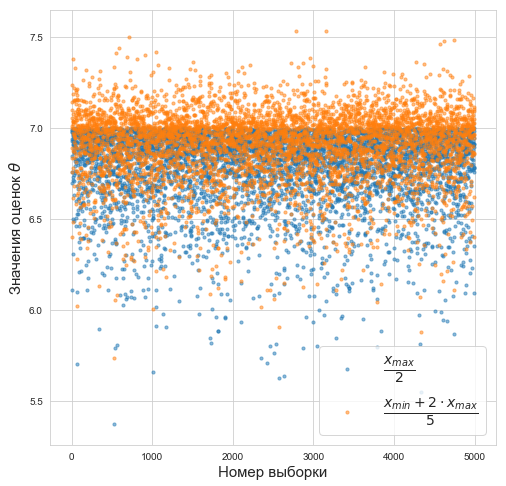

In [15]:
theta = 7
n = 5000
theta_hat = []
theta_tilde = []
for i in range(n):
    sample = np.random.uniform(theta, 2*theta, size=15)
    theta_hat.append(sample.max()/2)
    theta_tilde.append((sample.min() + 2*sample.max())/5)
theta_hat = np.array(theta_hat)
theta_tilde = np.array(theta_tilde)
print('Дисперсия theta_hat:', theta_hat.var())
print('Дисперсия theta_tilde:', theta_tilde.var())
plt.scatter(np.arange(n), theta_hat, label=r'$\frac{x_{max}}{2}$', alpha=0.5, s=10);
plt.scatter(np.arange(n), theta_tilde, label=r'$\frac{x_{min} + 2 \cdot x_{max}}{5}$', alpha=0.5, s=10);
plt.ylabel(r'Значения оценок $\theta$', fontsize=15);
plt.xlabel('Номер выборки', fontsize=15);
plt.legend(fontsize=20);

<font color='green'>Состоятельность</font>

Оценка называется состоятельно, если с ростом выборки, по которой она получена растёт и вероятность того, что она будет мало отличаться от истинного значения

Для предыдущей задачи проверим $\frac{x_{max}}{2}$ на состоятельность

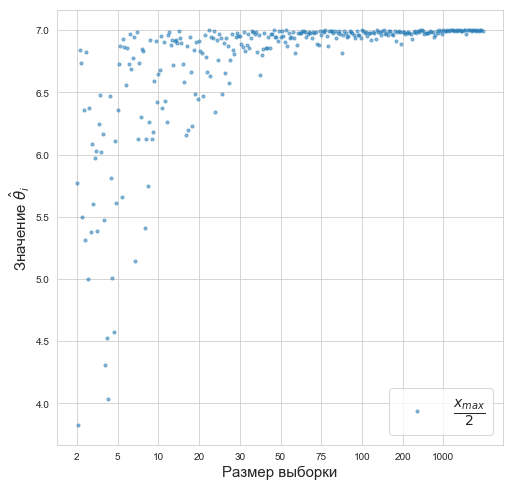

In [119]:
import itertools
theta = 7
theta_hat = []
sample_size = list(itertools.chain.from_iterable([[n]*30 for n in [2, 5, 10, 20, 30, 50, 75, 100, 200, 1000]]))
for i in sample_size:
    sample = np.random.uniform(theta, 2*theta, size=i)
    theta_hat.append(sample.max()/2)
theta_hat = np.array(theta_hat)
plt.scatter(np.arange(len(sample_size)), theta_hat, label=r'$\frac{x_{max}}{2}$', alpha=0.5, s=10);
plt.xticks(np.arange(0, len(sample_size), 30), sample_size[::30]);
plt.xlabel('Размер выборки', fontsize=15);
plt.ylabel(r'Значение $\hat \theta_{i}$', fontsize=15);
plt.legend(fontsize=20);

### Практическое применение

Рассмотрим набор данных adult_census_income (https://archive.ics.uci.edu/ml/datasets/adult)

In [4]:
dat = pd.read_csv(os.path.join(FILE_PATH, 'data/adult_census_income.csv'))
dat.columns = [col.replace('-', '_').replace('.', '_') for col in dat.columns]

In [5]:
print(dat.shape)
dat.head()

(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Посмотрим на количество пропусков

In [6]:
dat.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Пропусков в данных нет, однако есть значения "?", которые для нас всё равно что пропуски, посмотрим сколько таких значений

In [7]:
(dat == '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Поскольку у нас 32к наблюдений, для первичного анализа можно просто убрать наблюдения, содержащие '?'

In [9]:
dat = dat.loc[(dat == '?').sum(axis=1) == 0]
dat.index = range(dat.shape[0])

Описание переменных

<table>
    <tr>
        <td>age</td>
        <td>continuous</td>
    </tr>
    <tr>
        <td>workclass</td>
        <td>Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked</td>
    </tr>
    <tr>
        <td>fnlwgt</td>
        <td>continuous</td>
    </tr>
    <tr>
        <td>education</td>
        <td>Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool</td>
    </tr>
    <tr>
        <td>education-num</td>
        <td>continuous</td>
    </tr>
    <tr>
        <td>marital-status</td>
        <td>Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse</td>
    </tr>
    <tr>
        <td>occupation</td>
        <td>Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces</td>
    </tr>
    <tr>
        <td>relationship</td>
        <td>Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried</td>
    </tr>
    <tr>
        <td>race</td>
        <td>White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Blac</td>
    </tr>
    <tr>
        <td>sex</td>
        <td>Female, Male</td>
    </tr>
    <tr>
        <td>capital-gain</td>
        <td>continuous</td>
    </tr>
    <tr>
        <td>capital-loss</td>
        <td>continuous</td>
    </tr>
    <tr>
        <td>hours-per-week</td>
        <td>continuous</td>
    </tr>
    <tr>
        <td>native-country</td>
        <td>United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands</td>
    </tr>
</table>

In [10]:
dat.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Для категориальных переменных (object), посмотрим сколько значений они принимают

In [11]:
for col in dat.columns:
    if dat[col].dtype == 'object':
        print(col, dat[col].value_counts().shape[0])

workclass 7
education 16
marital_status 7
occupation 14
relationship 6
race 5
sex 2
native_country 41
income 2


Посмотрим на распределения переменных

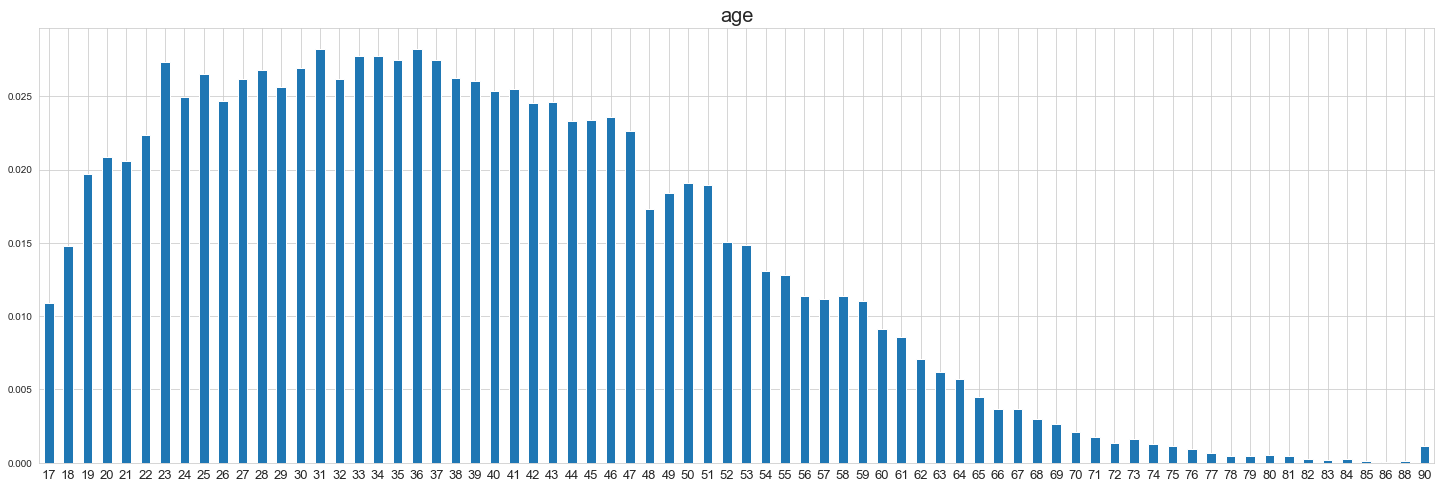

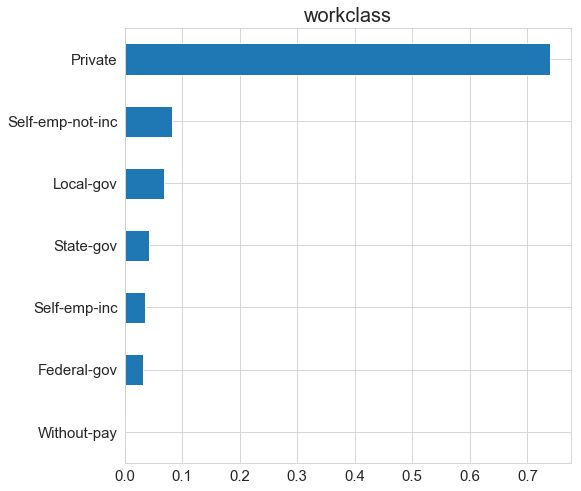

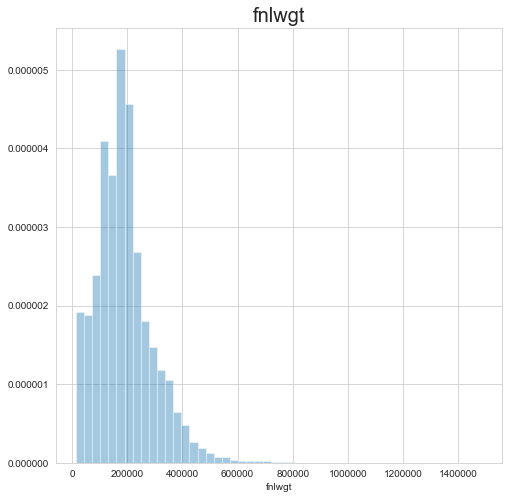

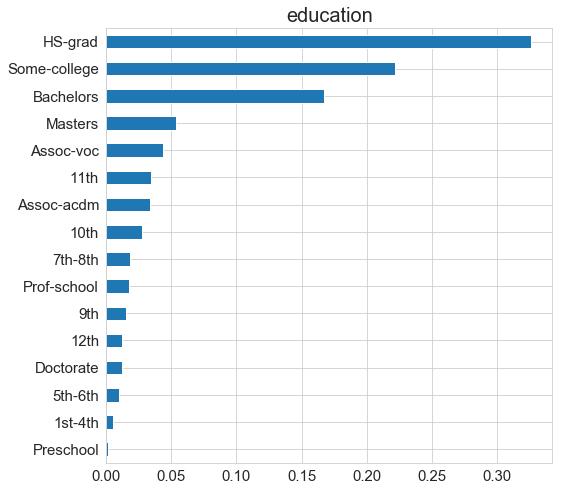

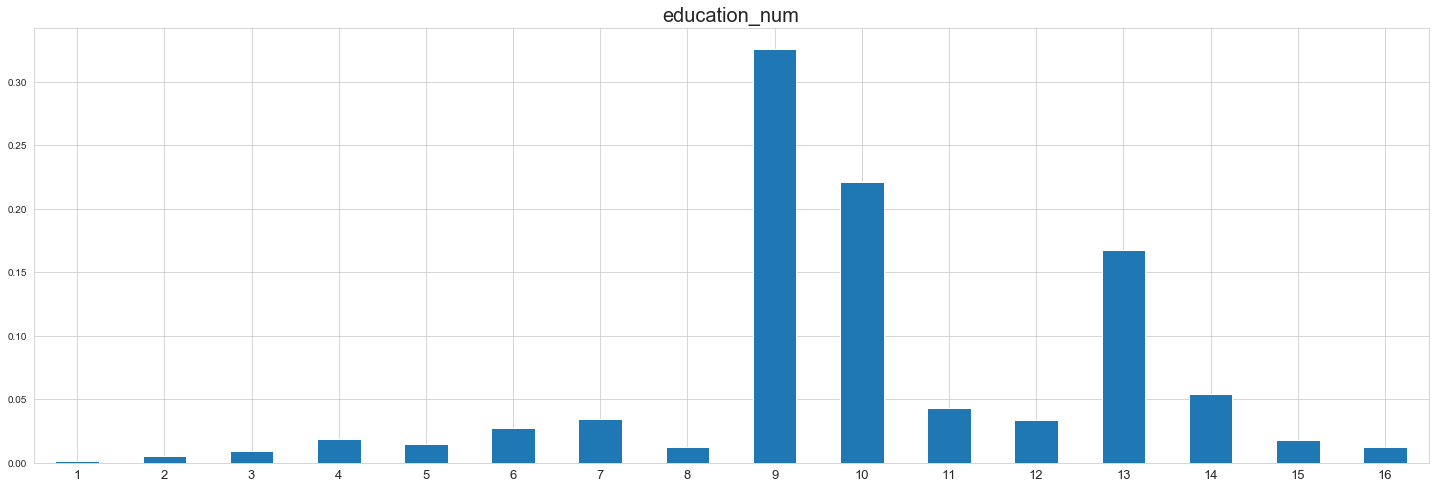

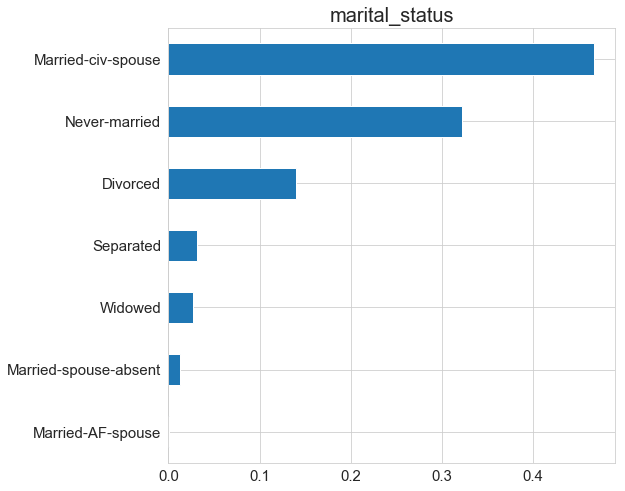

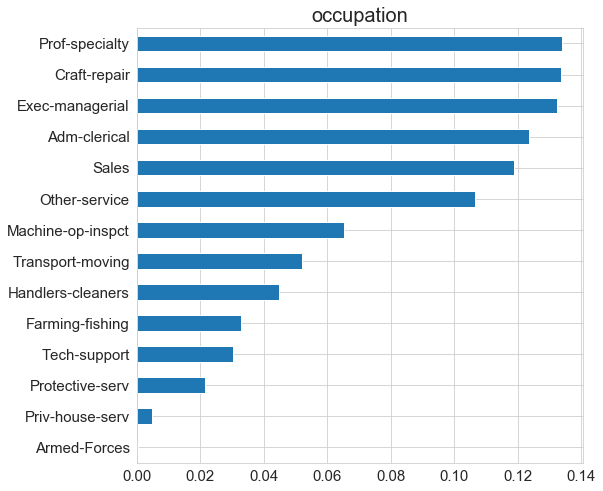

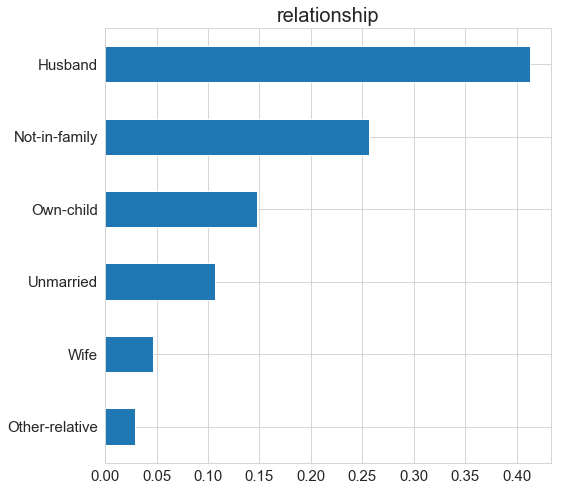

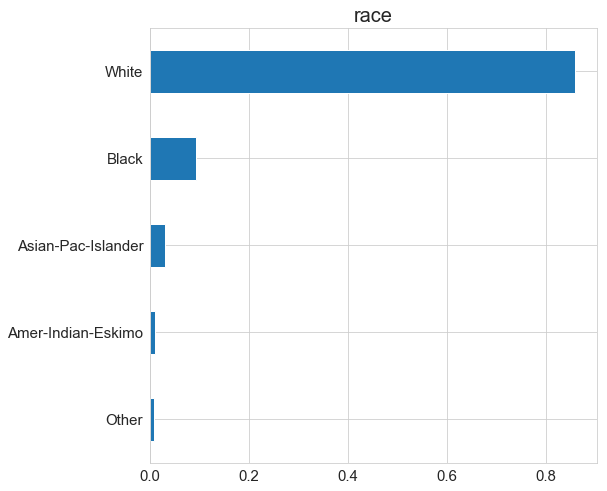

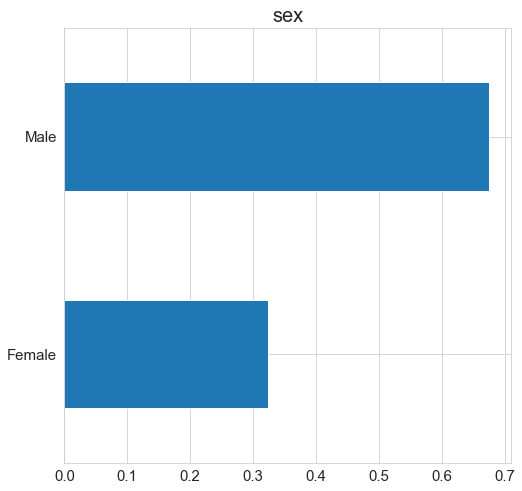

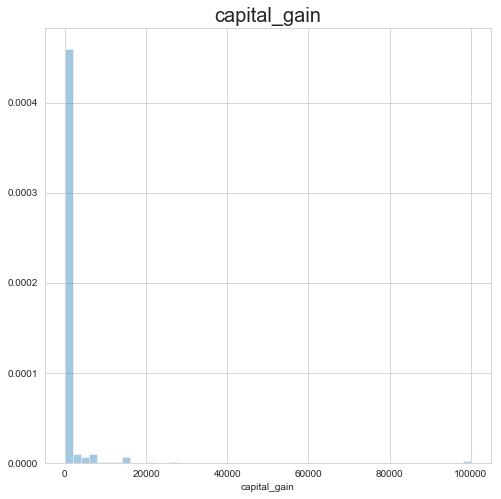

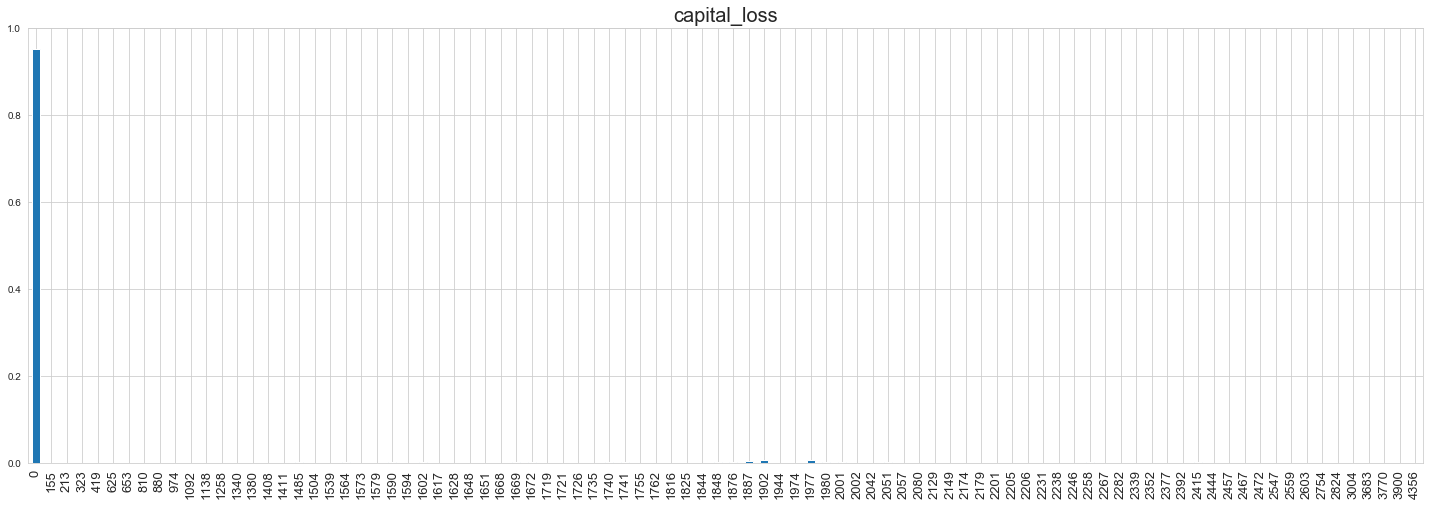

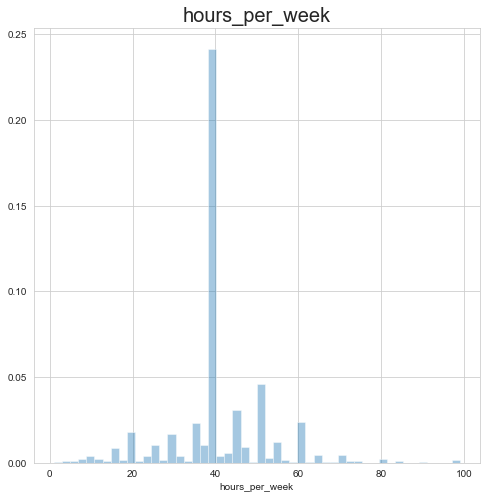

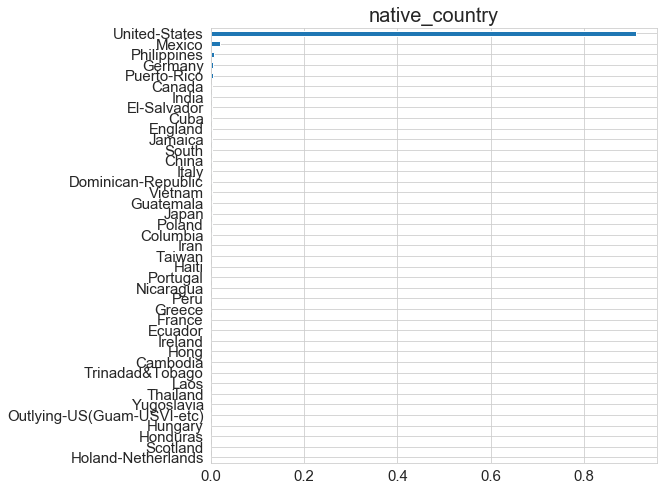

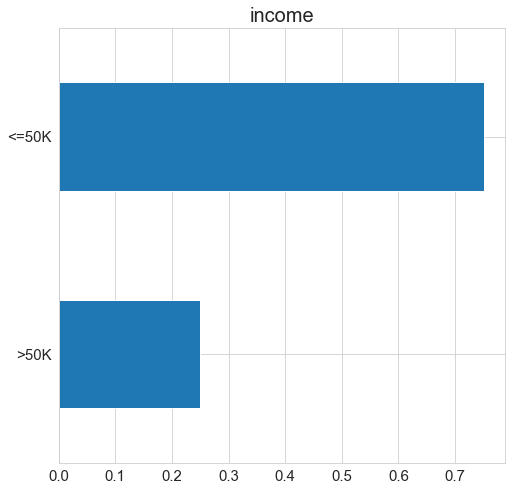

In [12]:
for col in dat.columns:
    if dat[col].dtype == 'object':
        plt.figure(figsize=(8, 8))
        dat[col].value_counts(1).sort_values(ascending=True).plot(kind='barh', fontsize=15);
        plt.title(col, fontsize=20);
    else:
        if dat[col].value_counts().shape[0] <= 90:
            plt.figure(figsize=(25, 8))
            dat[col].value_counts(1).sort_index(ascending=True).plot(kind='bar');
            plt.title(col, fontsize=20);
            if col == 'capital_loss':
                plt.xticks(fontsize=13);
            else:
                plt.xticks(rotation=0, fontsize=13);
        else:
            plt.figure(figsize=(8, 8))
            sns.distplot(dat[col], kde=False, norm_hist=True);
            plt.title(col, fontsize=20);

Наша финальная цель - выявить факторы, которые влияют на переменную income

Создадим бинарную переменную income_greater50, которая равна 1, если dat['income'] = '>50K'

In [13]:
keys = dat.income.value_counts().keys()
vals = [0, 1]
income_dict = dict(zip(keys, vals))
dat['income_greater50'] = dat.income.map(income_dict)

Посмотрим на зависимости между переменными

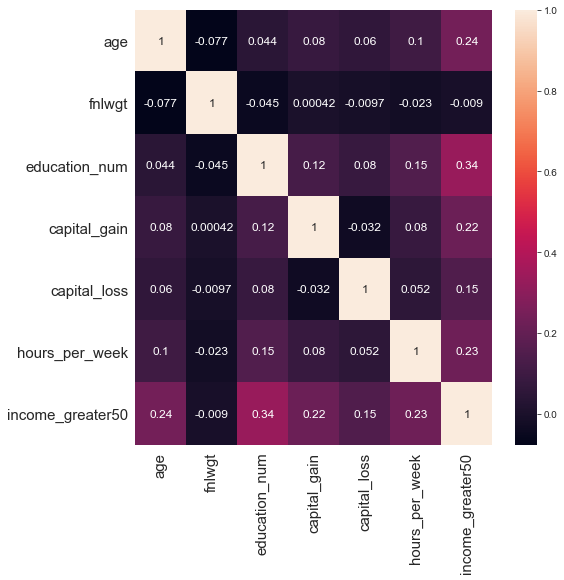

In [14]:
plt.figure(figsize=(8, 8))
sns.heatmap(dat.corr(method='pearson'), annot=True, annot_kws={'size': 12})
plt.xticks(fontsize=15, rotation=90);
plt.yticks(fontsize=15, rotation=0);

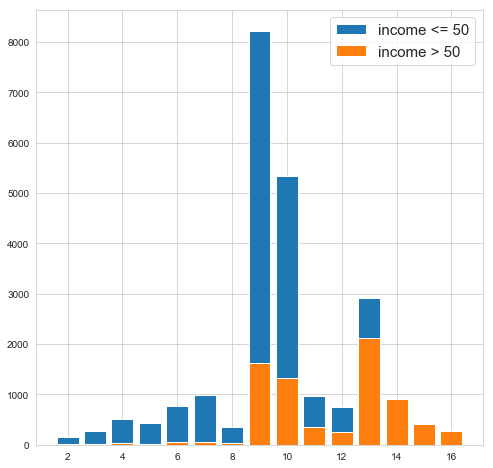

In [38]:
a = dat.groupby(['education_num', 'income_greater50'])['age'].count().reset_index().loc[1:]
plt.bar(a.education_num[a.income_greater50 == 0], a.age[a.income_greater50 == 0], label='income <= 50')
plt.bar(a.education_num[a.income_greater50 == 1], a.age[a.income_greater50 == 1], label='income > 50')
plt.legend(fontsize=15);

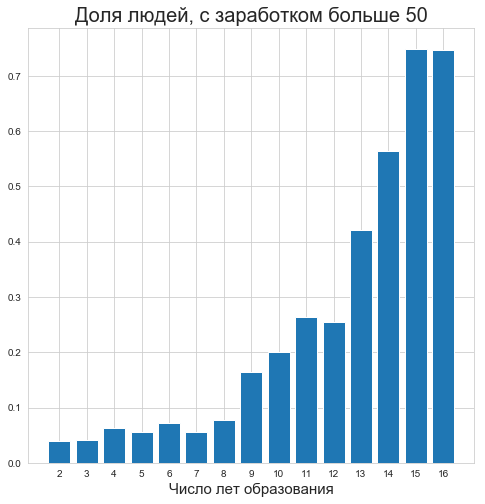

In [69]:
plt.title('Доля людей, с заработком больше 50', fontsize=20);
plt.bar(a.education_num[a.income_greater50 == 1], (a.age[a.income_greater50 == 1].values)/(a.age[a.income_greater50 == 1].values + a.age[a.income_greater50 == 0].values));
plt.xticks(a.education_num[a.income_greater50 == 1], np.arange(2, 16+1));
plt.xlabel('Число лет образования', fontsize=15);

Вывод из препыдущего графика - доля людей с зп > 50 растёт с числом лет образования

Посмотрим на долю людей в заработком больше 50 по возрастам

Найдём $p(inc > 50 | age)$

По Формуле условной вероятности, это будет $\frac{p(age, inc > 50)}{p(age)}$

Найдём совместное распределение $p(age, \ inc)$

In [132]:
ages = dat.age.value_counts().sort_index().keys().values
p_age_inc = np.zeros((ages.max() - ages.min() + 1, 3))
for i, age in enumerate(range(ages.min(), ages.max() + 1)):
    p_age_inc[i, 0] = age
    p_age_inc[i, 1] = dat.loc[(dat.age == age)&(dat.income_greater50 == 0)].shape[0] # для inc < 50
    p_age_inc[i, 2] = dat.loc[(dat.age == age)&(dat.income_greater50 == 1)].shape[0] # для inc > 50
count_all = p_age_inc[:, 1:].sum()
p_age_inc[:, 1:] /= count_all

Найдём $p(age) = \sum\limits_{inc \in \{ 0, 1 \}} p(age, \ inc)$

In [133]:
p_age = p_age_inc[:, 0]
p_age = np.c_[p_age, p_age_inc[:, 1:].sum(axis=1)]

Найдём $p(inc50 | age) = \frac{p(age, \ inc50 )}{p(age)}$

In [164]:
p_inc_cond_age = p_age_inc[:, 0]
p_inc_cond_age = np.c_[p_inc_cond_age, p_age_inc[:, 1:]/(np.repeat(p_age[:, 1], 2).reshape(-1, 2) + 1e-120)]

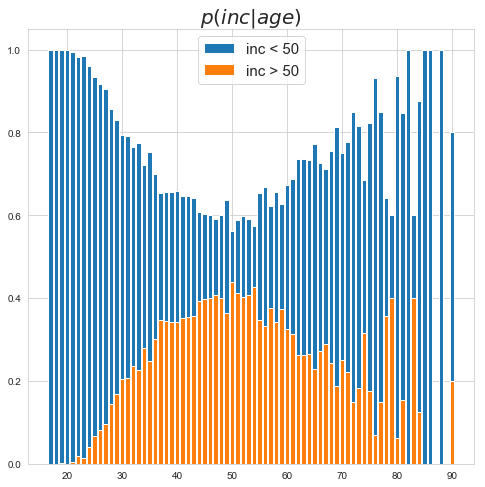

In [174]:
plt.title(r'$p(inc | age)$', fontsize=20);
plt.bar(p_inc_cond_age[:, 0], p_inc_cond_age[:, 1], label='inc < 50')
plt.bar(p_inc_cond_age[:, 0], p_inc_cond_age[:, 2], label='inc > 50');
plt.legend(fontsize=15);

Самая большая доля людей с заработком > 50 в возрасте около 50 лет.

Найдём теперь $p(inc50 | age, \ education\_num) = \frac{p(age, \ inc50, \ education\_num)}{p(age, \ education\_num)}$ 

Сначала найдём $p(age, \ inc50, \ education\_num)$

In [196]:
import itertools
p_age_inc_ednum = pd.DataFrame(columns=['probability', 'age', 'income_greater50', 'education_num'])
for age, ednum, inc50 in tqdm_notebook(itertools.product(set(dat.age), set(dat.education_num), [0, 1])):
    len_ = len(p_age_inc_ednum)
    p_age_inc_ednum.loc[len_, 'age'] = age
    p_age_inc_ednum.loc[len_, 'income_greater50'] = inc50
    p_age_inc_ednum.loc[len_, 'education_num'] = ednum
    p_age_inc_ednum.loc[len_, 'probability'] = dat.loc[(dat.age == age)&(dat.education_num == ednum)&(dat.income_greater50 == inc50)].shape[0]
p_age_inc_ednum['probability'] /= p_age_inc_ednum['probability'].sum()

Теперь найдём $p(age, \ education\_num) = \sum\limits_{inc50 \in \{0, 1\}} p(age, \ inc50, \ education\_num)$

In [210]:
p_age_ednum = p_age_inc_ednum.groupby(['age', 'education_num'])['probability'].sum().reset_index()

Наконец посчитаем $p(inc50 | age, \ education\_num)$

In [241]:
from copy import deepcopy
p_inc_cond_age_ednum = deepcopy(p_age_ednum)
for i, (age, ednum, _) in tqdm_notebook(enumerate(p_age_ednum.values)):
    p_inc_cond_age_ednum.probability[i] = p_age_inc_ednum.probability[(p_age_inc_ednum.age == age)&
                                                                      (p_age_inc_ednum.education_num == ednum)&
                                                                      (p_age_inc_ednum.income_greater50 == 1)]/(p_inc_cond_age_ednum.probability[i] + 1e-120)

Визуализируем $p(inc50 | age, \ education\_num)$

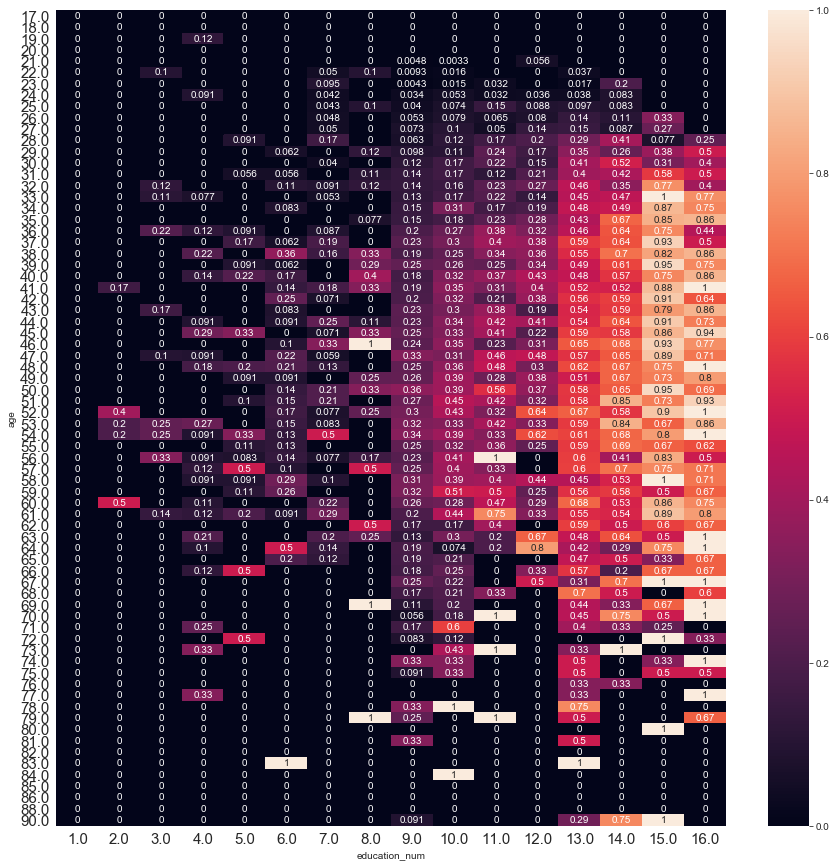

In [242]:
plt.figure(figsize=(15, 15))
sns.heatmap(pd.crosstab(p_inc_cond_age_ednum.age, p_inc_cond_age_ednum.education_num, p_inc_cond_age_ednum.probability, aggfunc=np.sum), 
            annot=True);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

Задача кредитного скоринга

In [46]:
dat = pd.read_csv(os.path.join(FILE_PATH, 'data/german.csv'), sep=';')
dat.columns = ['_'.join(col.lower().replace('/',' ').strip().split()) for col in dat.columns]
print(dat.shape)
dat.head()

(1000, 21)


,status_of_existing_checking_account,duration_in_month,credit_history,purpose,credit_amount,savings_account_bonds,present_employment_since,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,other_debtors_guarantors,...,property,age_in_years,other_installment_plans,housing,number_of_existing_credits_at_this_bank,job,number_of_people_being_liable_to_provide_maintenance_for,telephone,foreign_worker,bad_credit
0,1 : ... < 0 DM,6,4 : critical account/ other credits existing (...,3 : radio/television,1169,5 : unknown/ no savings account,5 : .. >= 7 years,4,3 : male : single,1 : none,...,1 : real estate,67,3 : none,2 : own,2,3 : skilled employee / official,1,"2 : yes, registered under the customers name",1 : yes,0
1,2 : 0 <= ... < 200 DM,48,2 : existing credits paid back duly till now,3 : radio/television,5951,1 : ... < 100 DM,3 : 1 <= ... < 4 years,2,2 : female : divorced/separated/married,1 : none,...,1 : real estate,22,3 : none,2 : own,1,3 : skilled employee / official,1,1 : none,1 : yes,1
2,4 : no checking account,12,4 : critical account/ other credits existing (...,6 : education,2096,1 : ... < 100 DM,4 : 4 <= ... < 7 years,2,3 : male : single,1 : none,...,1 : real estate,49,3 : none,2 : own,1,2 : unskilled - resident,2,1 : none,1 : yes,0
3,1 : ... < 0 DM,42,2 : existing credits paid back duly till now,2 : furniture/equipment,7882,1 : ... < 100 DM,4 : 4 <= ... < 7 years,2,3 : male : single,3 : guarantor,...,2 : if not 1 : building society savings agreem...,45,3 : none,3 : for free,1,3 : skilled employee / official,2,1 : none,1 : yes,0
4,1 : ... < 0 DM,24,3 : delay in paying off in the past,0 : car (new),4870,1 : ... < 100 DM,3 : 1 <= ... < 4 years,3,3 : male : single,1 : none,...,4 : unknown / no property,53,3 : none,3 : for free,2,3 : skilled employee / official,2,1 : none,1 : yes,1


Нашей конечной целью будет выявление факторов, которые влияют на переменную bad_credit

Есть ли в данных пропуски

In [47]:
dat.isnull().sum()

status_of_existing_checking_account                         0
duration_in_month                                           0
credit_history                                              0
purpose                                                     0
credit_amount                                               0
savings_account_bonds                                       0
present_employment_since                                    0
installment_rate_in_percentage_of_disposable_income         0
personal_status_and_sex                                     0
other_debtors_guarantors                                    0
present_residence_since                                     0
property                                                    0
age_in_years                                                0
other_installment_plans                                     0
housing                                                     0
number_of_existing_credits_at_this_bank                     0
job     

Описательные статистики переменных

In [48]:
dat.describe()

,duration_in_month,credit_amount,installment_rate_in_percentage_of_disposable_income,present_residence_since,age_in_years,number_of_existing_credits_at_this_bank,number_of_people_being_liable_to_provide_maintenance_for,bad_credit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


Корреляционная матрица переменных

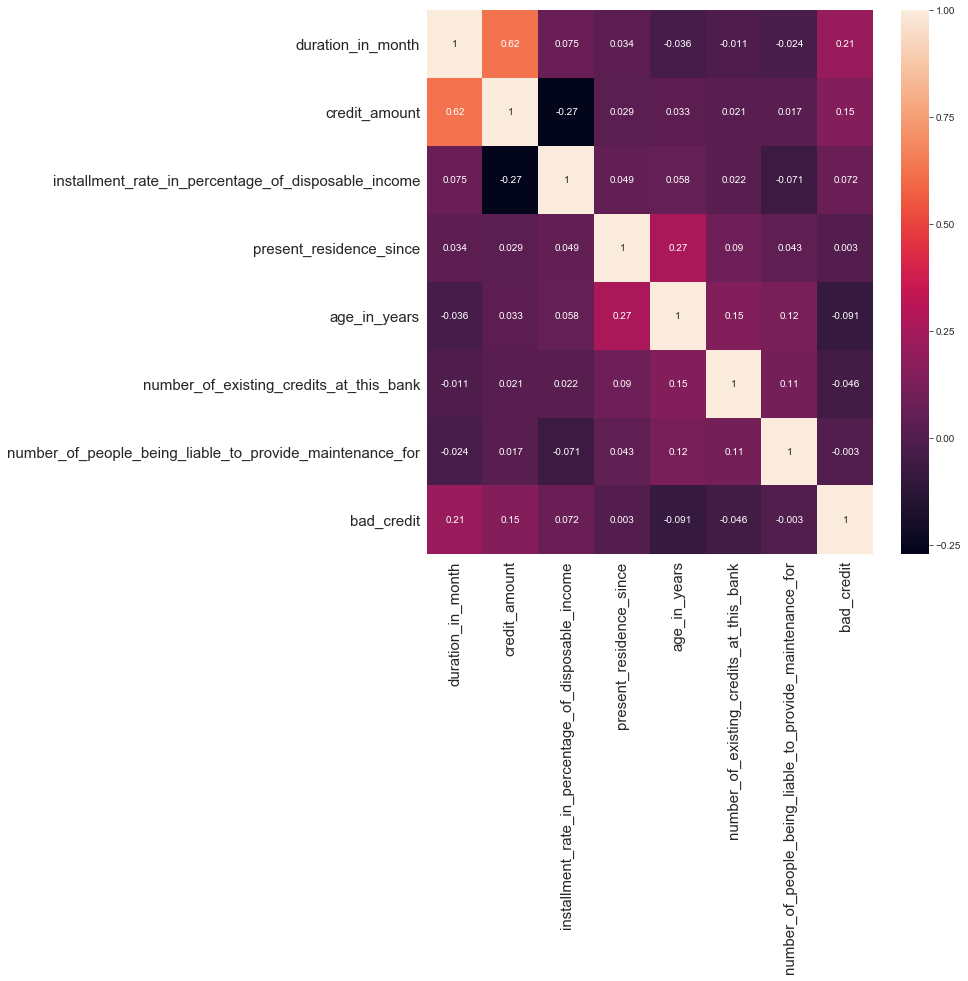

In [49]:
plt.figure(figsize=(10, 10))
sns.heatmap(dat.corr(), annot=True, annot_kws={'size': 10});
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

Сколько уникальных значений у каждой переменной

In [50]:
for col in dat.columns:
    print('{}:'.format(col), dat[col].value_counts().shape[0])

status_of_existing_checking_account: 4
duration_in_month: 33
credit_history: 5
purpose: 10
credit_amount: 921
savings_account_bonds: 5
present_employment_since: 5
installment_rate_in_percentage_of_disposable_income: 4
personal_status_and_sex: 4
other_debtors_guarantors: 3
present_residence_since: 4
property: 4
age_in_years: 53
other_installment_plans: 3
housing: 3
number_of_existing_credits_at_this_bank: 4
job: 4
number_of_people_being_liable_to_provide_maintenance_for: 2
telephone: 2
foreign_worker: 2
bad_credit: 2


Посмотрим на распределения переменных

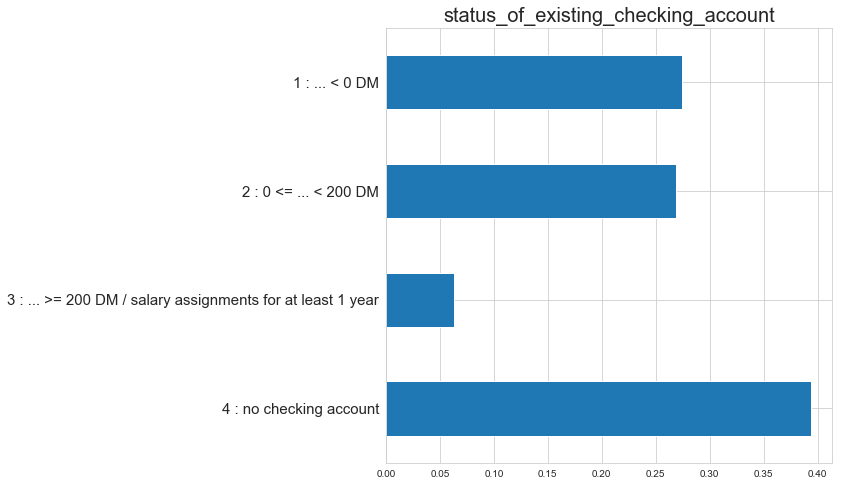

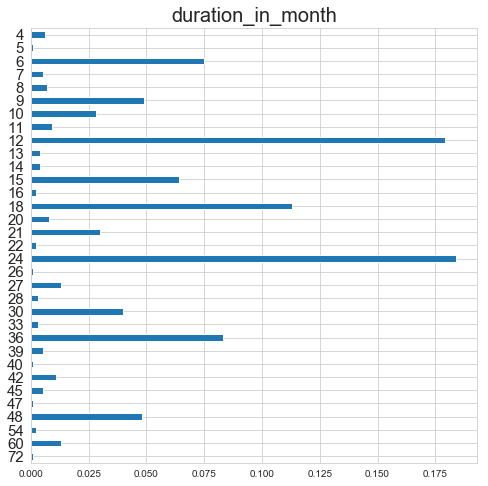

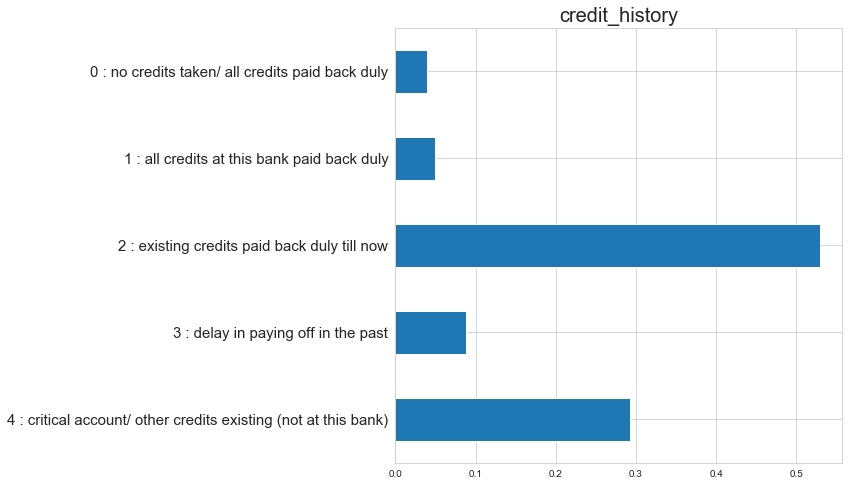

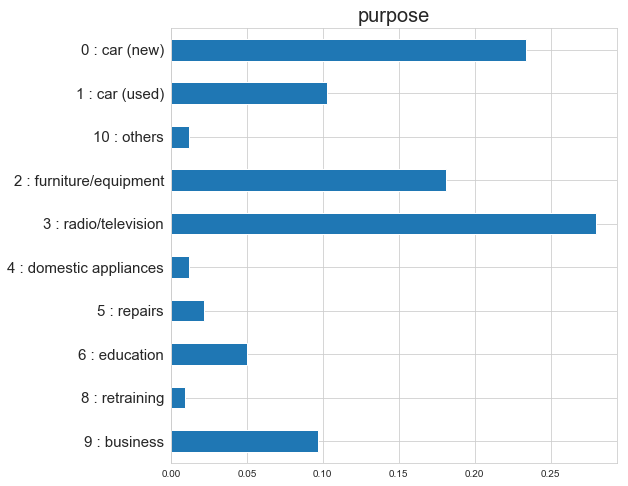

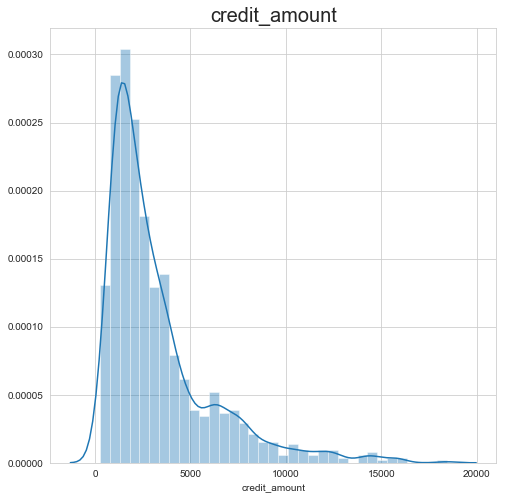

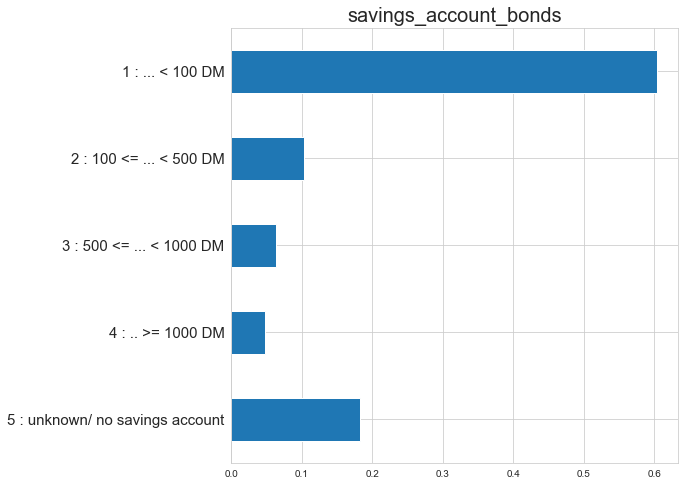

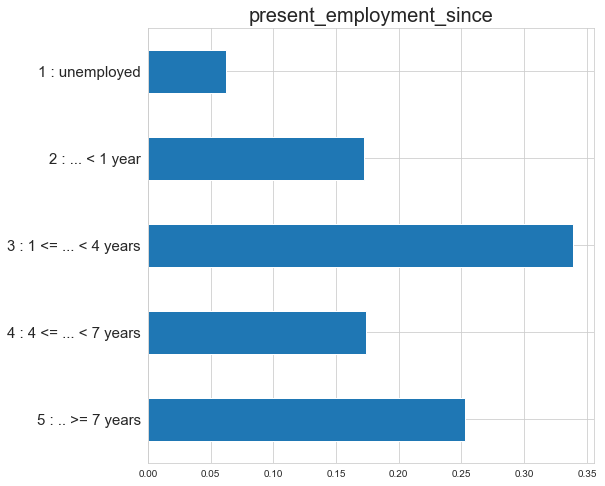

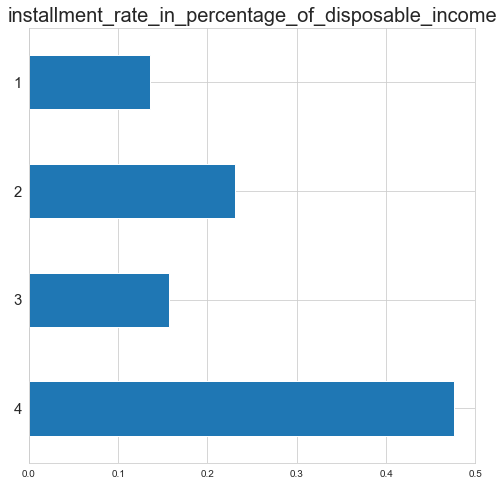

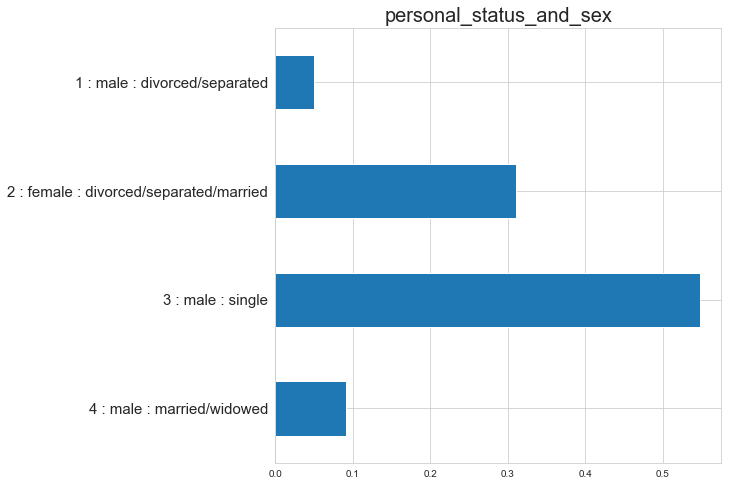

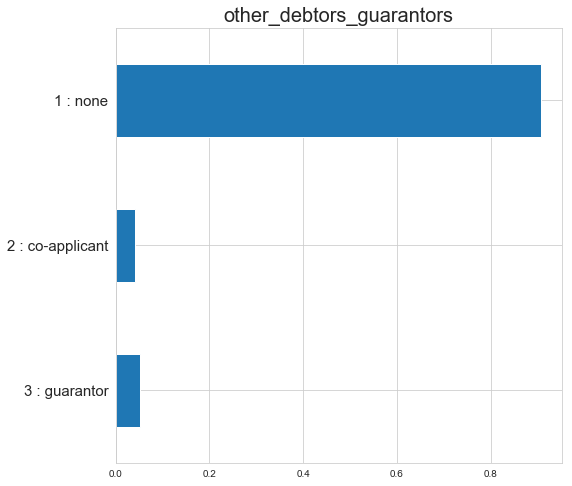

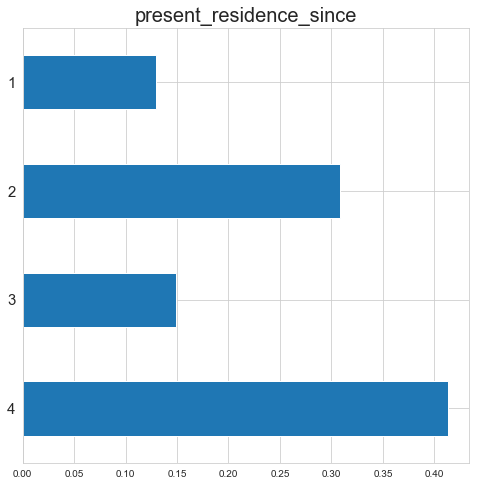

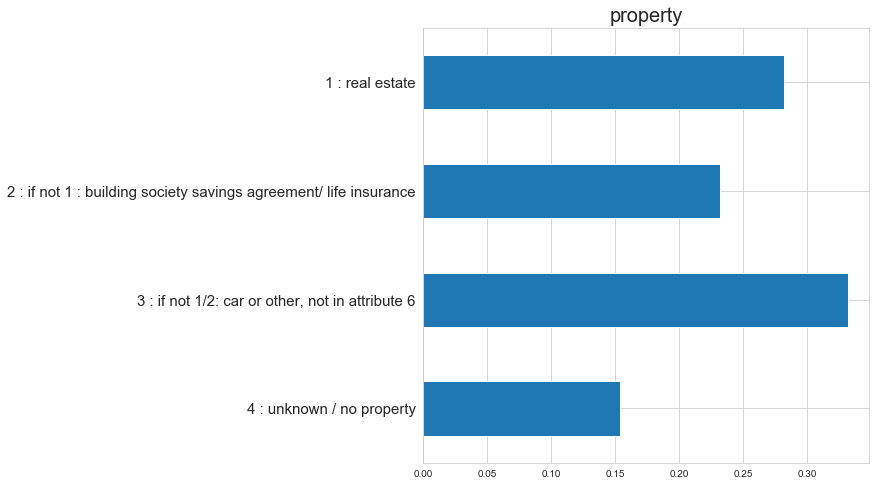

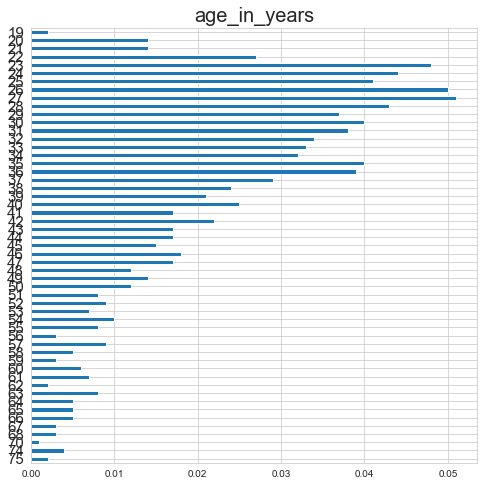

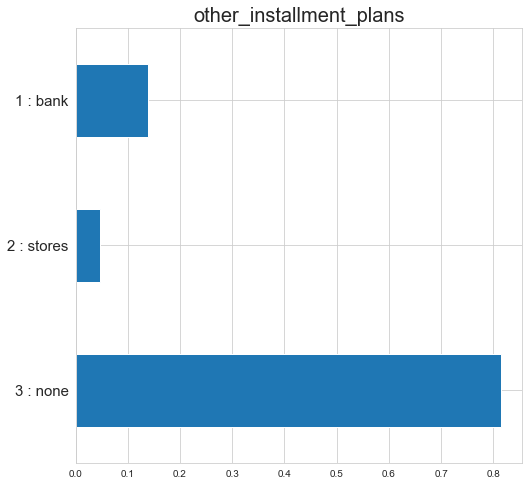

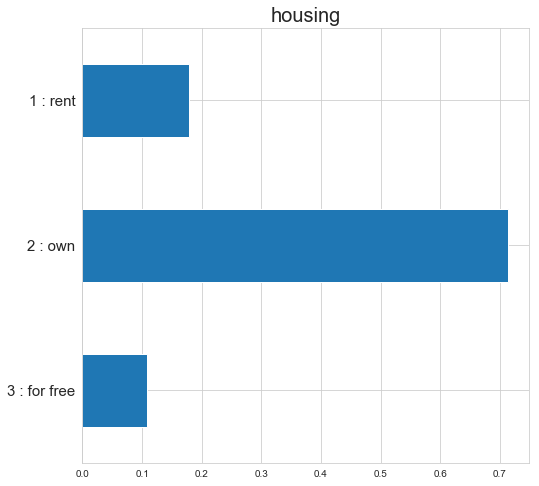

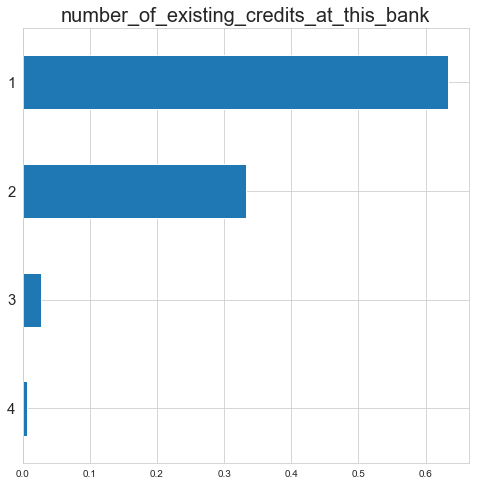

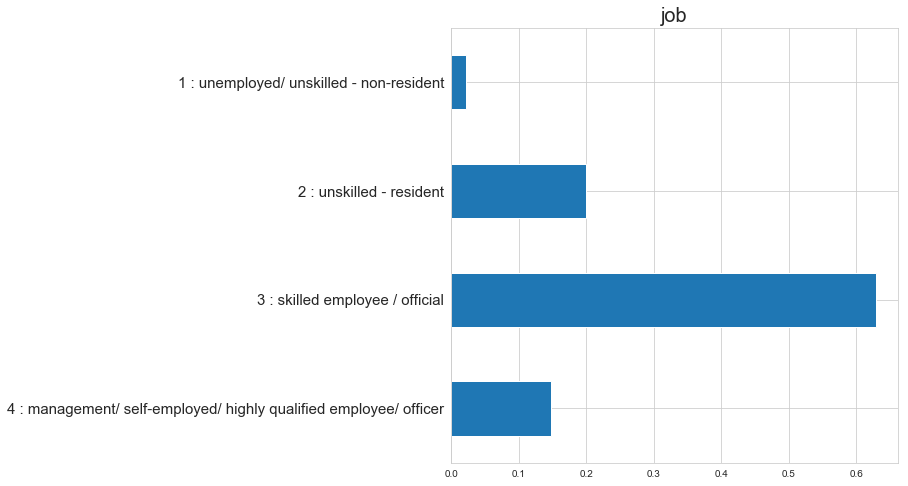

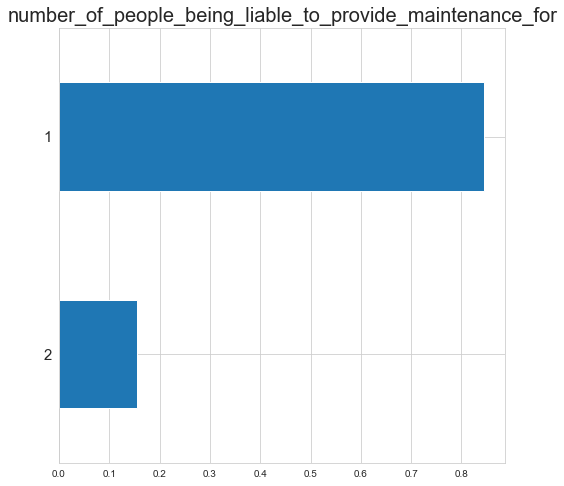

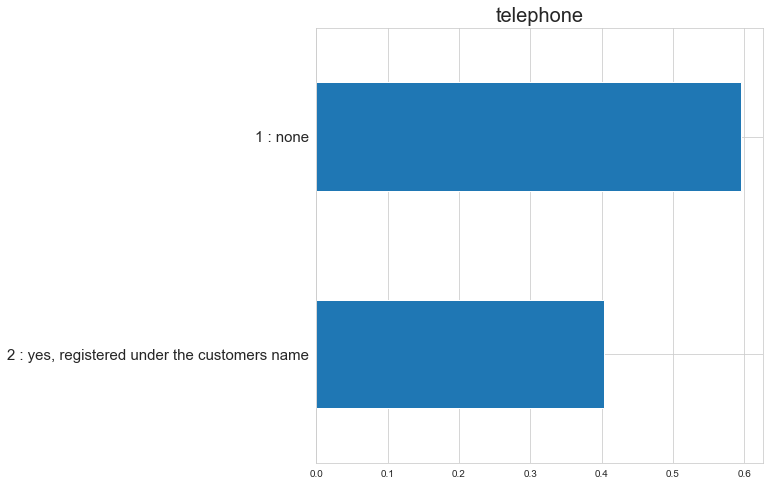

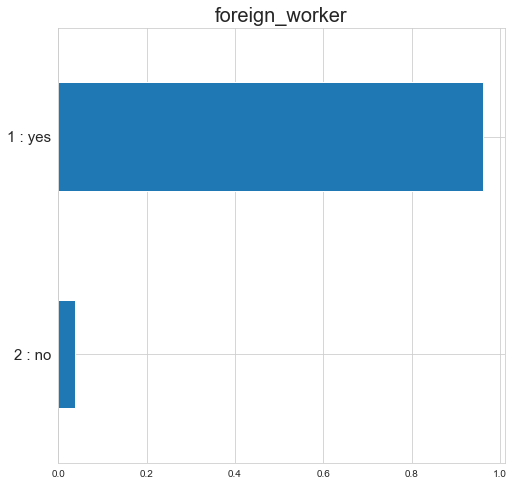

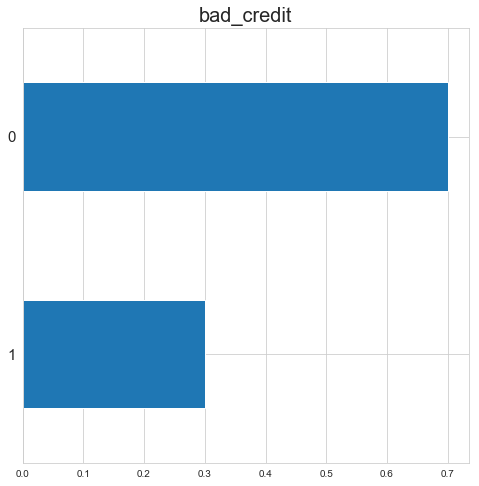

In [59]:
for col in dat.columns:
    if col == 'credit_amount':
        plt.figure(figsize=(8, 8));
        sns.distplot(dat.credit_amount);
        plt.title('{}'.format(col), fontsize=20);
    else:
        plt.figure(figsize=(8, 8));
        dat[col].value_counts(1).sort_index(ascending=False).plot(kind='barh');
        plt.yticks(fontsize=15);
        plt.title('{}'.format(col), fontsize=20);

Попробуем оценить условную вероятность одобрения кредита

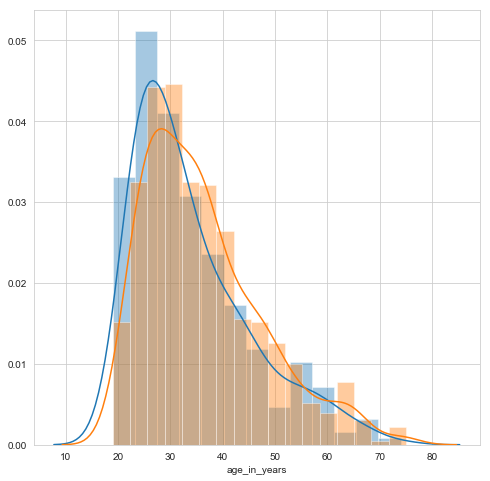

In [60]:
sns.distplot(dat.age_in_years[dat.bad_credit == 1])
sns.distplot(dat.age_in_years[dat.bad_credit == 0])

In [61]:
def p_y_x(y, x, data=dat):
    x_dom = np.array(list(data[x].value_counts().sort_index().keys()))
    p_x_y = np.zeros((data[y].value_counts().shape[0], x_dom.shape[0]))
    for n, y_value in enumerate(data[y].value_counts().sort_index().keys()):
        for m, x_value in enumerate(x_dom):
            p_x_y[n, m] = (data[x][data[y] == y_value] == x_value).mean()
    p_y = data[y].value_counts(1).sort_index().values
    p_x = p_y.dot(p_x_y)
    return x_dom, (p_y.reshape(-1, 1)*p_x_y/p_x).T

In [304]:
x, p = p_y_x(y='bad_credit', x='age_in_years')

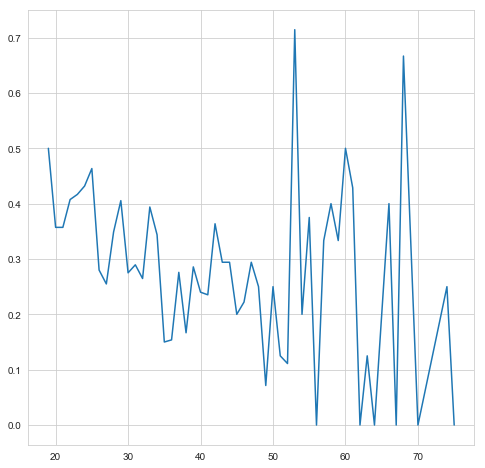

In [330]:
plt.plot(x_dom, p[:, 1]);

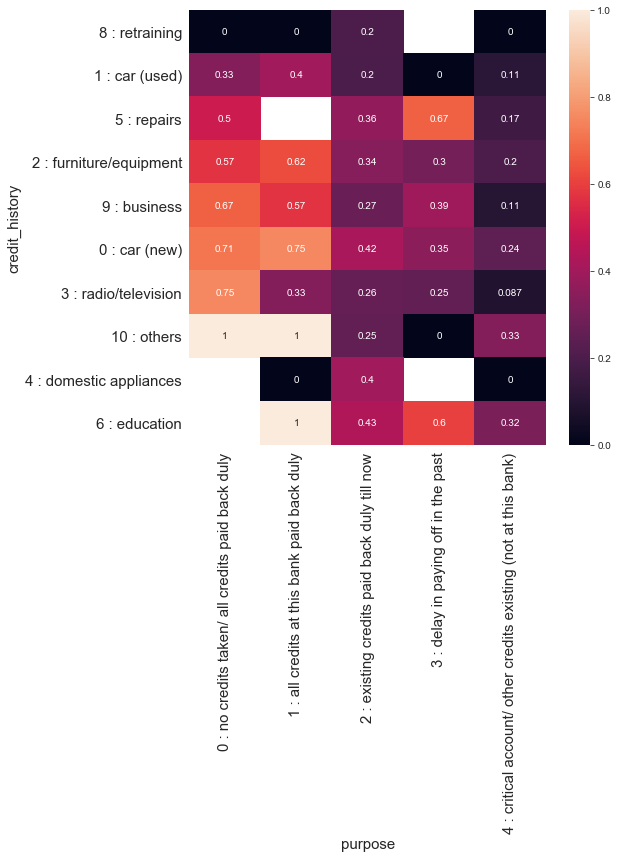

In [62]:
col1 = 'purpose'
col2 = 'credit_history'
a = pd.crosstab(dat[col1], dat[col2], dat['bad_credit'], aggfunc=np.mean)
sns.heatmap(a.sort_values(by=a.columns.values.tolist()), annot=True, annot_kws={'size': 10});
plt.yticks(fontsize=15);
plt.ylabel(col2, fontsize=15);
plt.xlabel(col1, fontsize=15);
plt.xticks(fontsize=15);

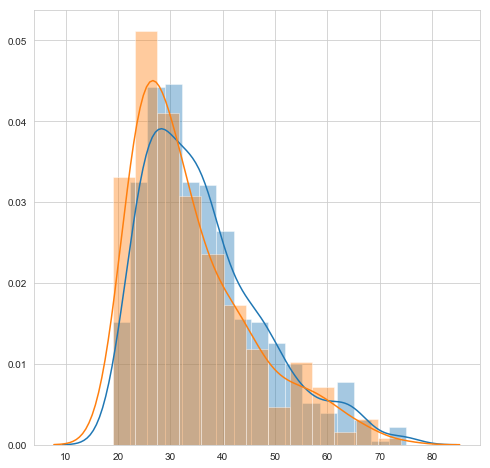

In [117]:
sns.distplot(dat.age_in_years[dat.bad_credit == 0].values)
sns.distplot(dat.age_in_years[dat.bad_credit == 1].values)

https://www.kaggle.com/c/home-credit-default-risk/data